# Libraries and constants

In [2]:
library(ggplot2)
library(glue)
library(tidyverse)
library(scales)
library(grid)
library(ggpubr)
library(comprehenr)
library(listarrays)
library(lubridate)
library(gridExtra)
library(reshape2)

std_width  <- 12
std_height <- 7
options(repr.plot.width = std_width, repr.plot.height = std_height)

colors <- c(
    "#fd7f6f",
    "#7eb0d5",
    "#b2e061",
    "#bd7ebe",
    "#ffb55a",
    "#8bd3c7"
)

fontsize <- 22

---

# Exercise 1 

The number of particles emitted by a radioactive source during a fixed interval of time ($\Delta t = 10\,s$) follows a Poisson distribution on the parameter $\mu$. The number of particles observed during consecutive time intervals is:  

$$
y=\{4, 1, 3, 1, 3\}
$$


A) Assuming a flat prior for the parameter $\mu$, determine and plot the posterior distribution for $\mu$. Evaluate mean, median and variance both analitically and numerically.

B) Assuming a Jeffrey's prior for the parameter $\mu$, determine and plot the posterior distribution for $\mu$. Evaluate mean, median and variance both analitically and numerically.

C) Evaluate a $95\%$ credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximtion for the posterior distribution that has the same mean and standard deviation.

## A)

Assuming a flat (improper) prior on $\mu$ ($g(\mu)=1$ for $\mu>0$), the posterior of a Poisson process is a $\Gamma(\alpha,\,\lambda)$. After $n$ observations ${y_k}$ the two posterior parameters are $\alpha=\sum_k y_k + 1$ and $\lambda=n$.

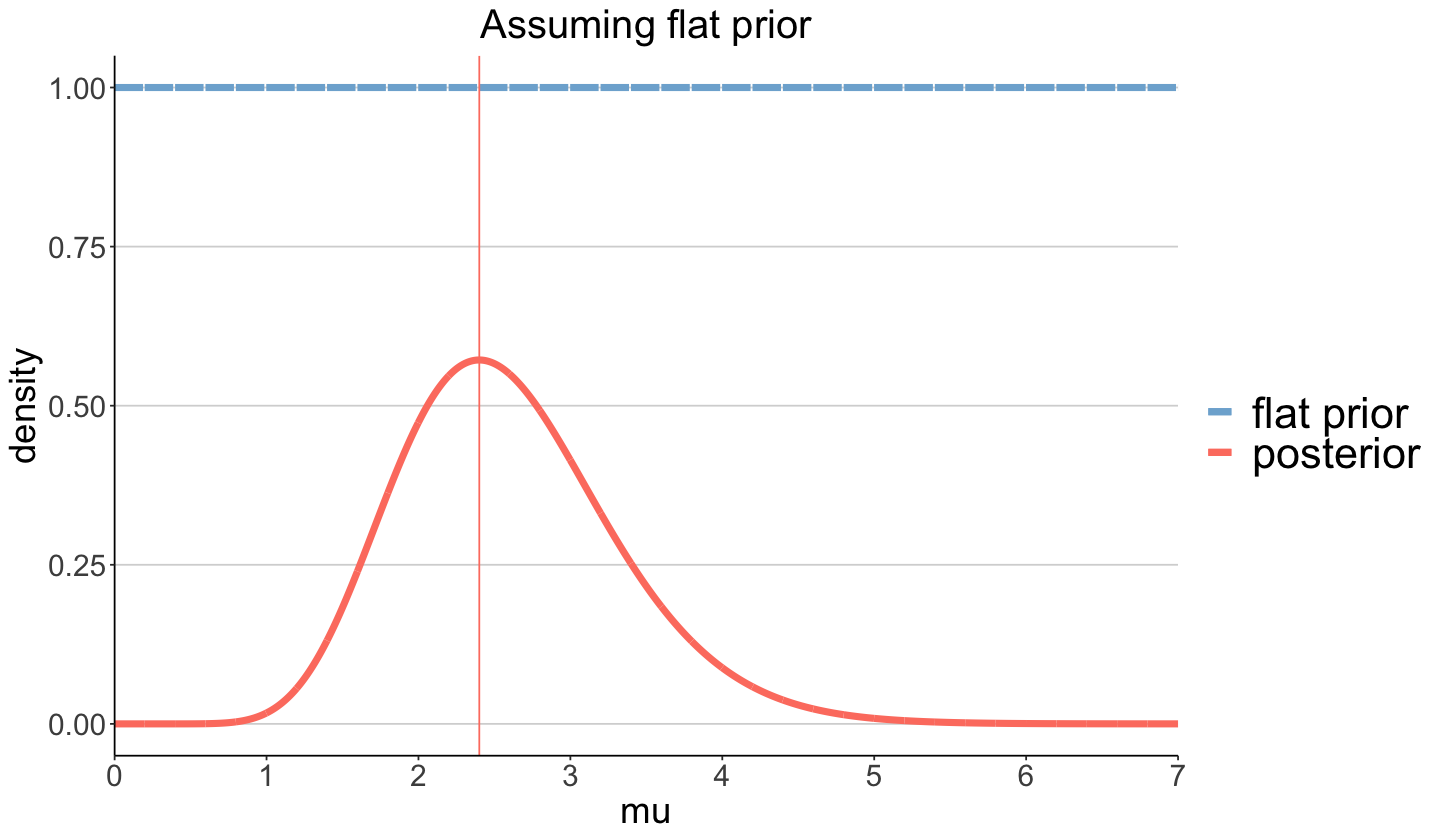

In [2]:
# data
y <- c(4, 1, 3, 1, 3)
n <- length(y)

# gamma parameters assuming flat prior
alpha_flat  <- sum(y) + 1
lambda_flat <- n

# parameter we want to infer
mu_min <- 0
mu_max <- 10
mu_len <- 5000
mu <- seq(mu_min, mu_max, len = mu_len)

# flat prior
flat_prior <- rep(1, mu_len)

# posterior assuming flat prior
posterior_flat <- dgamma(mu, shape = alpha_flat, rate = lambda_flat)


# PLOT - FLAT PRIOR
plt <- ggplot() +
geom_line(
    aes(
        x = mu,
        y = flat_prior,
        color = "flat prior"
    ),
    size = 2,
    linetype = "dashed"
) +
geom_line(
    aes(
        x = mu,
        y = posterior_flat,
        color = "posterior"
    ),
    size = 2,
    linetype = "solid"
)  +
geom_vline(
    xintercept = mu[which.max(posterior_flat)],
    color = colors[1],
    size = 0.5
) +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    legend.title = element_text(size = fontsize),
    legend.text  = element_text(size = fontsize + 4),
    # legend.position = c(0.8, 0.825),
    panel.grid.major.y = element_line(
    color    = alpha("black", 0.2),
    size     = 0.5,
    linetype = 1
)
) +
labs(
    title = "Assuming flat prior",
    x     = "mu",
    y     = "density",
) +
coord_cartesian(xlim = c(0, 7)) +
scale_x_continuous(breaks = pretty_breaks(), expand = c(0, 0)) +
scale_color_manual(
     name = "",
     values = c(colors[2], colors[1]),
     breaks = c("flat prior", "posterior")
)

plt

Now we want to compute *mean*, *median* and *variance* of the posterior. Knowing it is a Gamma distribution with fixed parameters, we have

$$
    \text{mean}=\frac{\alpha}{\lambda}\\
    \text{variance}=\frac{\alpha}{\lambda^2}
$$

There is no analytic formula for the median.

In [3]:
posterior_flat_mean   <- alpha_flat / lambda_flat
posterior_flat_var    <- alpha_flat / lambda_flat^2
posterior_flat_median <- qgamma(0.5, shape = alpha_flat, rate = lambda_flat)

cat(
    "\n",
    glue(
        "Mean:\t{posterior_flat_mean}"
    ),
    "\n",
    glue(
        "Variance:\t{posterior_flat_var}"
    ),
    "\n",
    glue(
        "Median:\t{round(posterior_flat_median,3)}"
    )
)


 Mean:	2.6 
 Variance:	0.52 
 Median:	2.534

We are also asked to compute these quantities numerically:

In [4]:
mu_step <- (mu_max - mu_min) / mu_len

posterior_flat_mean_num   <- sum(
    mu * posterior_flat
) * mu_step
posterior_flat_var_num    <- sum(
    mu^2 * posterior_flat
) * mu_step - posterior_flat_mean_num^2
posterior_flat_median_num <- mu[
    which.min(
        abs(
            cumsum(posterior_flat) * mu_step - 0.5
        )
    )
]
cat(
    "\n",
    glue(
        "Mean:\t{round(posterior_flat_mean_num,3)}"
    ),
    "\n",
    glue(
        "Variance:\t{round(posterior_flat_var_num,3)}"
    ),
    "\n",
    glue(
        "Median:\t{round(posterior_flat_median_num,3)}"
    )
)


 Mean:	2.599 
 Variance:	0.521 
 Median:	2.533

## B)

Assuming a Jeffrey's (improper) prior on $\mu$ ($g(\mu)\propto 1/\sqrt{\mu}$ for $\mu>0$), the posterior of a Poisson process is a $\Gamma(\alpha,\,\lambda)$. After $n$ observations ${y_k}$ the two posterior parameters are $\alpha=\sum_k y_k + 1$ and $\lambda=n$.

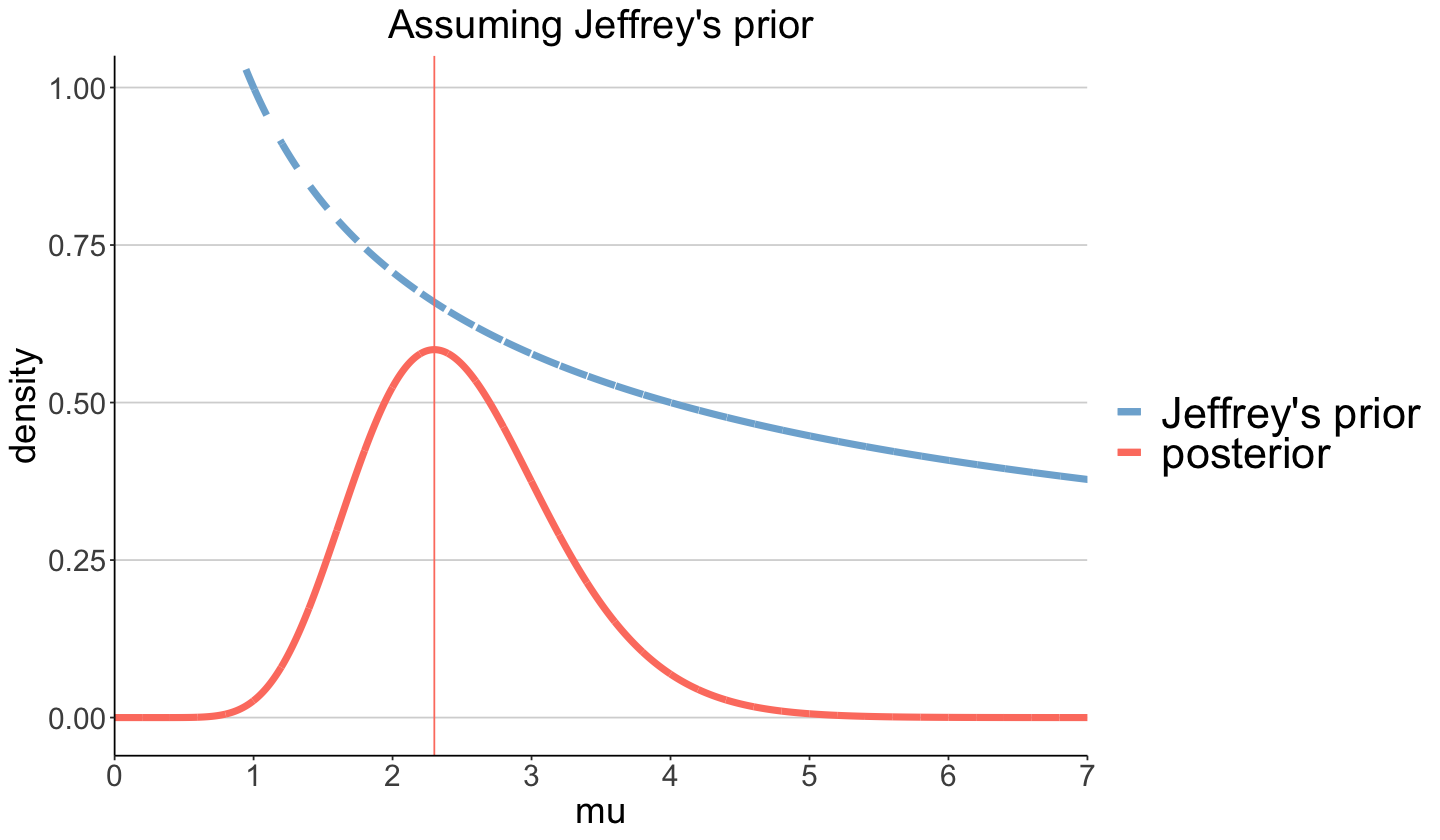

In [5]:
# data
y <- c(4, 1, 3, 1, 3)
n <- length(y)

# gamma parameters assuming Jeffrey's prior
alpha_jeff  <- sum(y) + 1 / 2
lambda_jeff <- n

# parameter we want to infer
mu_min <- 0
mu_max <- 10
mu_len <- 5000
mu <- seq(mu_min, mu_max, len = mu_len)

# Jeffrey's prior
jeff_prior <- 1 / sqrt(mu)

# posterior assuming Jeffrey's prior
posterior_jeff <- dgamma(mu, shape = alpha_jeff, rate = lambda_jeff)


# PLOT - JEFFREYS PRIOR
plt <- ggplot() +
geom_line(
    aes(
        x = mu,
        y = jeff_prior,
        color = "Jeffrey's prior"
    ),
    size = 2,
    linetype = "dashed"
) +
geom_line(
    aes(
        x = mu,
        y = posterior_jeff,
        color = "posterior"
    ),
    size = 2,
    linetype = "solid"
)  +
geom_vline(
    xintercept = mu[which.max(posterior_jeff)],
    color = colors[1],
    size = 0.5
) +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    legend.title = element_text(size = fontsize),
    legend.text  = element_text(size = fontsize + 4),
    # legend.position = c(0.8, 0.825),
    panel.grid.major.y = element_line(
    color    = alpha("black", 0.2),
    size     = 0.5,
    linetype = 1
)
) +
labs(
    title = "Assuming Jeffrey's prior",
    x     = "mu",
    y     = "density",
) +
coord_cartesian(xlim = c(0, 7), ylim = c(-0.01, 1)) +
scale_x_continuous(breaks = pretty_breaks(), expand = c(0, 0)) +
scale_color_manual(
     name = "",
     values = c(colors[2], colors[1]),
     breaks = c("Jeffrey's prior", "posterior")
)

plt

Now we want to compute *mean*, *median* and *variance* of the posterior. Knowing it is a Gamma distribution with fixed parameters, we have

$$
    \text{mean}=\frac{\alpha}{\lambda}\\
    \text{variance}=\frac{\alpha}{\lambda^2}
$$

There is no analytic formula for the median.

In [6]:
posterior_jeff_mean   <- alpha_jeff / lambda_jeff
posterior_jeff_var    <- alpha_jeff / lambda_jeff^2
posterior_jeff_median <- qgamma(0.5, shape = alpha_jeff, rate = lambda_jeff)

cat(
    "\n",
    glue(
        "Mean:\t{posterior_jeff_mean}"
    ),
    "\n",
    glue(
        "Variance:\t{posterior_jeff_var}"
    ),
    "\n",
    glue(
        "Median:\t{round(posterior_jeff_median,3)}"
    )
)


 Mean:	2.5 
 Variance:	0.5 
 Median:	2.434

We are also asked to compute these quantities numerically:

In [7]:
mu_step <- (mu_max - mu_min) / mu_len

posterior_jeff_mean_num   <- sum(
    mu * posterior_jeff
) * mu_step
posterior_jeff_var_num    <- sum(
    mu^2 * posterior_jeff
) * mu_step - posterior_jeff_mean_num^2
posterior_jeff_median_num <- mu[
    which.min(
        abs(
            cumsum(posterior_jeff) * mu_step - 0.5
        )
    )
]
cat(
    "\n",
    glue(
        "Mean:\t{round(posterior_jeff_mean_num,3)}"
    ),
    "\n",
    glue(
        "Variance:\t{round(posterior_jeff_var_num,3)}"
    ),
    "\n",
    glue(
        "Median:\t{round(posterior_jeff_median_num,3)}"
    )
)


 Mean:	2.499 
 Variance:	0.501 
 Median:	2.432

## C)

Let us now compute 95% CI for the two posteriors and a gaussian approximation.

In [8]:
# gaussian approximation
posterior_gaus <- dnorm(
    mu,
    mean = posterior_jeff_mean,
    sd = sqrt(posterior_jeff_var)
)

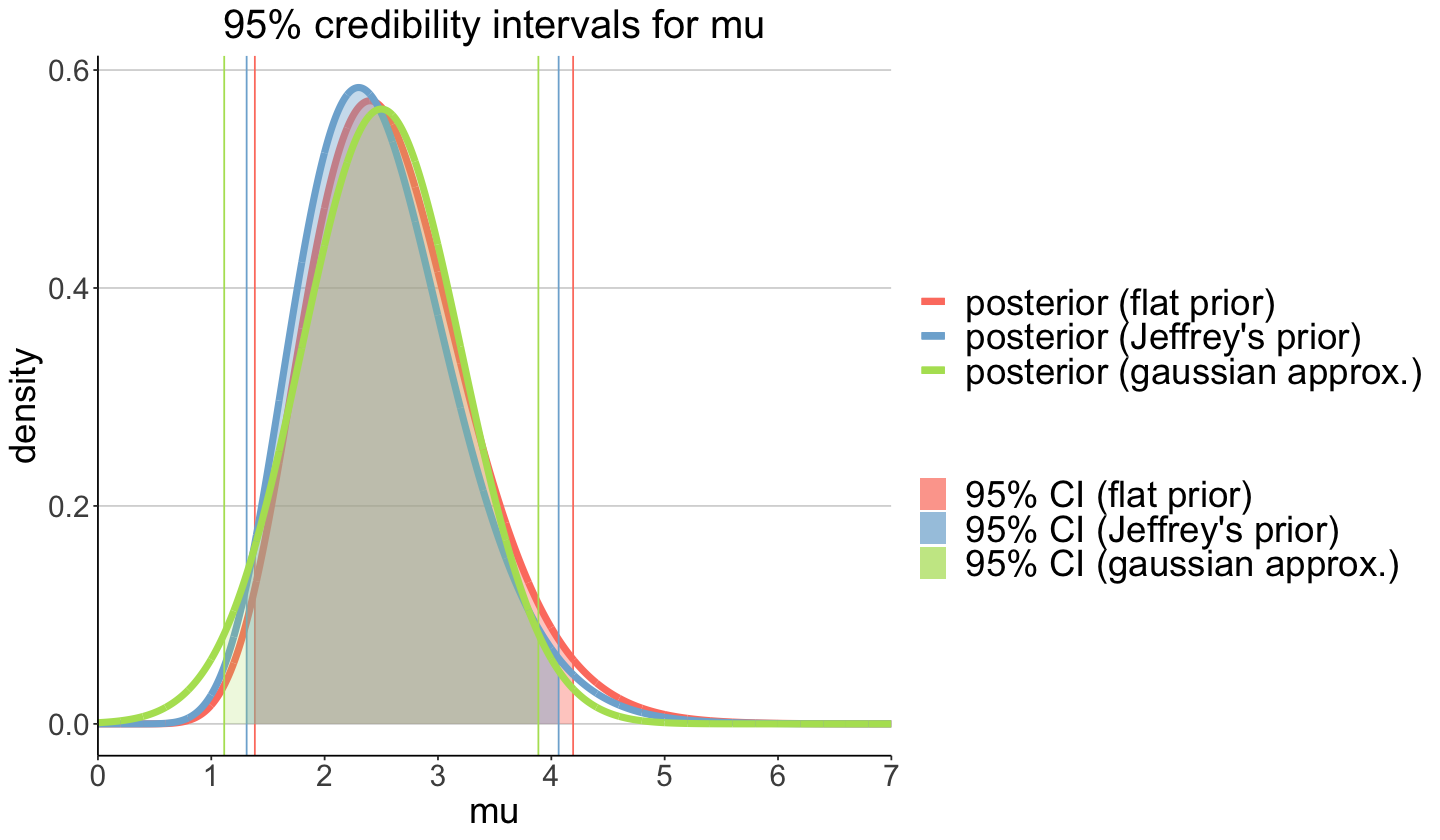

In [9]:
# level of credibility
cl <- 0.95

# left probability
q1 <- (1 - cl) / 2
# right probability
q2 <- 1 - q1

# compute left quantiles
mu_min_flat <- qgamma(q1, shape = alpha_flat, rate = lambda_flat)
mu_min_jeff <- qgamma(q1, shape = alpha_jeff, rate = lambda_jeff)
mu_min_gaus <- qnorm(q1, mean = posterior_jeff_mean, sd = sqrt(posterior_jeff_var))

# compute right quantiles
mu_max_flat <- qgamma(q2, shape = alpha_flat, rate = lambda_flat)
mu_max_jeff <- qgamma(q2, shape = alpha_jeff, rate = lambda_jeff)
mu_max_gaus <- qnorm(q2, mean = posterior_jeff_mean, sd = sqrt(posterior_jeff_var))

flat_df <- tibble(x = mu, y = posterior_flat)
jeff_df <- tibble(x = mu, y = posterior_jeff)
gaus_df <- tibble(x = mu, y = posterior_gaus)

plt <- ggplot() +
geom_line(
    aes(
        x = mu,
        y = posterior_flat,
        color = "posterior (flat prior)"
    ),
    size = 2,
    linetype = "solid"
) +
geom_area(
    data = flat_df[flat_df$x > mu_min_flat & flat_df$x < mu_max_flat, ],
    aes(
        x = x,
        y = y,
        fill = "95% CI (flat prior)"
    ),
    alpha = 0.4
) +
geom_vline(
    xintercept = mu_min_flat,
    color = colors[1],
    size = 0.5
) +
geom_vline(
    xintercept = mu_max_flat,
    color = colors[1],
    size = 0.5
) +
geom_line(
    aes(
        x = mu,
        y = posterior_jeff,
        color = "posterior (Jeffrey's prior)"
    ),
    size = 2,
    linetype = "solid"
) +
geom_area(
    data = jeff_df[jeff_df$x > mu_min_jeff & jeff_df$x < mu_max_jeff, ],
    aes(
        x = x,
        y = y,
        fill = "95% CI (Jeffrey's prior)"
    ),
    alpha = 0.4
) +
geom_vline(
    xintercept = mu_min_jeff,
    color = colors[2],
    size = 0.5
) +
geom_vline(
    xintercept = mu_max_jeff,
    color = colors[2],
    size = 0.5
) +
geom_line(
    aes(
        x = mu,
        y = posterior_gaus,
        color = "posterior (gaussian approx.)"
    ),
    size = 2,
    linetype = "solid"
) +
geom_area(
    data = gaus_df[gaus_df$x > mu_min_gaus & gaus_df$x < mu_max_gaus, ],
    aes(
        x = x,
        y = y,
        fill = "95% CI (gaussian approx.)"
    ),
    alpha = 0.2
) +
geom_vline(
    xintercept = mu_min_gaus,
    color = colors[3],
    size = 0.5
) +
geom_vline(
    xintercept = mu_max_gaus,
    color = colors[3],
    size = 0.5
) +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    legend.title = element_text(size = fontsize),
    legend.text  = element_text(size = fontsize),
    # legend.position = c(0.8, 0.825),
    panel.grid.major.y = element_line(
    color    = alpha("black", 0.2),
    size     = 0.5,
    linetype = 1
)
) +
labs(
    title = "95% credibility intervals for mu",
    x     = "mu",
    y     = "density",
) +
coord_cartesian(xlim = c(0, 7)) +
scale_x_continuous(breaks = pretty_breaks(), expand = c(0, 0)) +
scale_fill_manual(
    name = "",
    values = c(colors[1], colors[2], colors[3]),
    breaks = c("95% CI (flat prior)", "95% CI (Jeffrey's prior)", "95% CI (gaussian approx.)")
) +
scale_color_manual(
    name = "",
    values = c(colors[1], colors[2], colors[3]),
    breaks = c("posterior (flat prior)", "posterior (Jeffrey's prior)", "posterior (gaussian approx.)")
) +
guides(
    fill  = guide_legend(order = 2),
    color = guide_legend(order = 1)
)

plt

---

# Exercise 2 - The Lighthouse Problem

Given the problem of the lighthouse discussed last week, study the case in which both the position along the shore ($\alpha$) and the distance out at sea ($\beta$) are unknown.

The lighthouse emits uniformly in $\theta_k$, $\mathbb{P}(\theta_k|\alpha,\beta) = 1/\pi$.
Each signal is received at $x_k = \beta \tan \theta_k + \alpha$, following a distribution given by the change of random variables from $\theta_k$ to $x_k$, leading to a **Cauchy** distribution:
$$\mathbb{P}(x|\alpha,\beta) = \mathbb{P}(\theta|\alpha,\beta) \left|\frac{\mathrm{d}\theta}{\mathrm{d}x}\right| = \frac{1}{\pi} \frac{\beta}{\beta^2 + (x-\alpha)^2} $$

The likelihood is given by the product of probabilities of the $N$ single detections:
$$P(\mathrm{Data} |\alpha, \beta) = \prod_{j=1}^N \mathbb{P}(x_j|\alpha,\beta) $$

## Homework: 

We first assume that the distance $\beta$ is known and that the only missing parameter is $\alpha$.

Since $\beta$ tells us nothing about $\alpha$, we assume a uniform prior on the parameter $\alpha$.

We also assume that $\beta=1\,\text{km}$ and $\alpha_{\text{true}}=1,\,\text{km}$. 

In [10]:
# logarithm of the likelihood
compute_log_likelihood <- function(data, a, b) {
    logL <- 0
    for (x in data) {
        logL <- logL - log(1 + ((x - a) / b)^2)
    }
    return(logL)
}

# generate samples from uniform distribution in theta
rlighthouse <- function(num, alpha, beta) {
    angles <- runif(num, min=-pi/2, max=pi/2)
    
    xk <- beta * tan(angles) + alpha
    
    return(xk)
}

In [61]:
plot_posterior <- function(
    parameter,
    posterior,
    color = colors[1],
    size = 2,
    xmin = -6,
    xmax = +6,
    xlab = "alpha",
    ylab = "density",
    title = "plot"
) {
    plt <- ggplot() +
    geom_line(
        aes(
            x = parameter,
            y = posterior
        ),
        color = color,
        size = size,
    ) +
    theme_classic() +
    theme(
        plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
        axis.title   = element_text(size = fontsize),
        axis.text    = element_text(size = fontsize - 4),
        legend.title = element_text(size = fontsize),
        legend.text  = element_text(size = fontsize),
        legend.position = "none"
        # panel.grid.major.y = element_line(
        #     color    = alpha("black", 0.2),
        #     size     = 0.5,
        #     linetype = 1
        # )
    ) +
    labs(
        title = title,
        x     = xlab,
        y     = ylab,
    ) +
    coord_cartesian(xlim = c(xmin, xmax)) +
    scale_x_continuous(breaks = pretty_breaks(), expand = c(0, 0))


    return(plt)
}




plot_posterior_2d <- function(
    data,
    col1 = "alpha",
    col2 = "beta",
    col3 = "posterior",
    xlab = "alpha",
    ylab = "beta",
    zlab = "density",
    title = "plot"
) {
    plt <- ggplot(
        data = data
    ) +
    geom_contour_filled(
        aes_string(
            x = col1,
            y = col2,
            z = col3
        ),
        bins = 20,
        show.legend = FALSE
    ) +
    theme_classic() +
    theme(
        plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
        axis.title   = element_text(size = fontsize),
        axis.text    = element_text(size = fontsize - 4),
        legend.title = element_text(size = fontsize),
        legend.text  = element_text(size = fontsize),
    ) +
    labs(
        title = title,
        x     = xlab,
        y     = ylab,
        z     = zlab
    ) 
    # coord_cartesian(xlim = c(-6, 6), ylim = c(0, 10)) +
    # scale_x_continuous(breaks = pretty_breaks(), expand = c(0, 0)) +
    # scale_y_continuous(breaks = pretty_breaks(), expand = c(0, 0))

    return(plt)
}

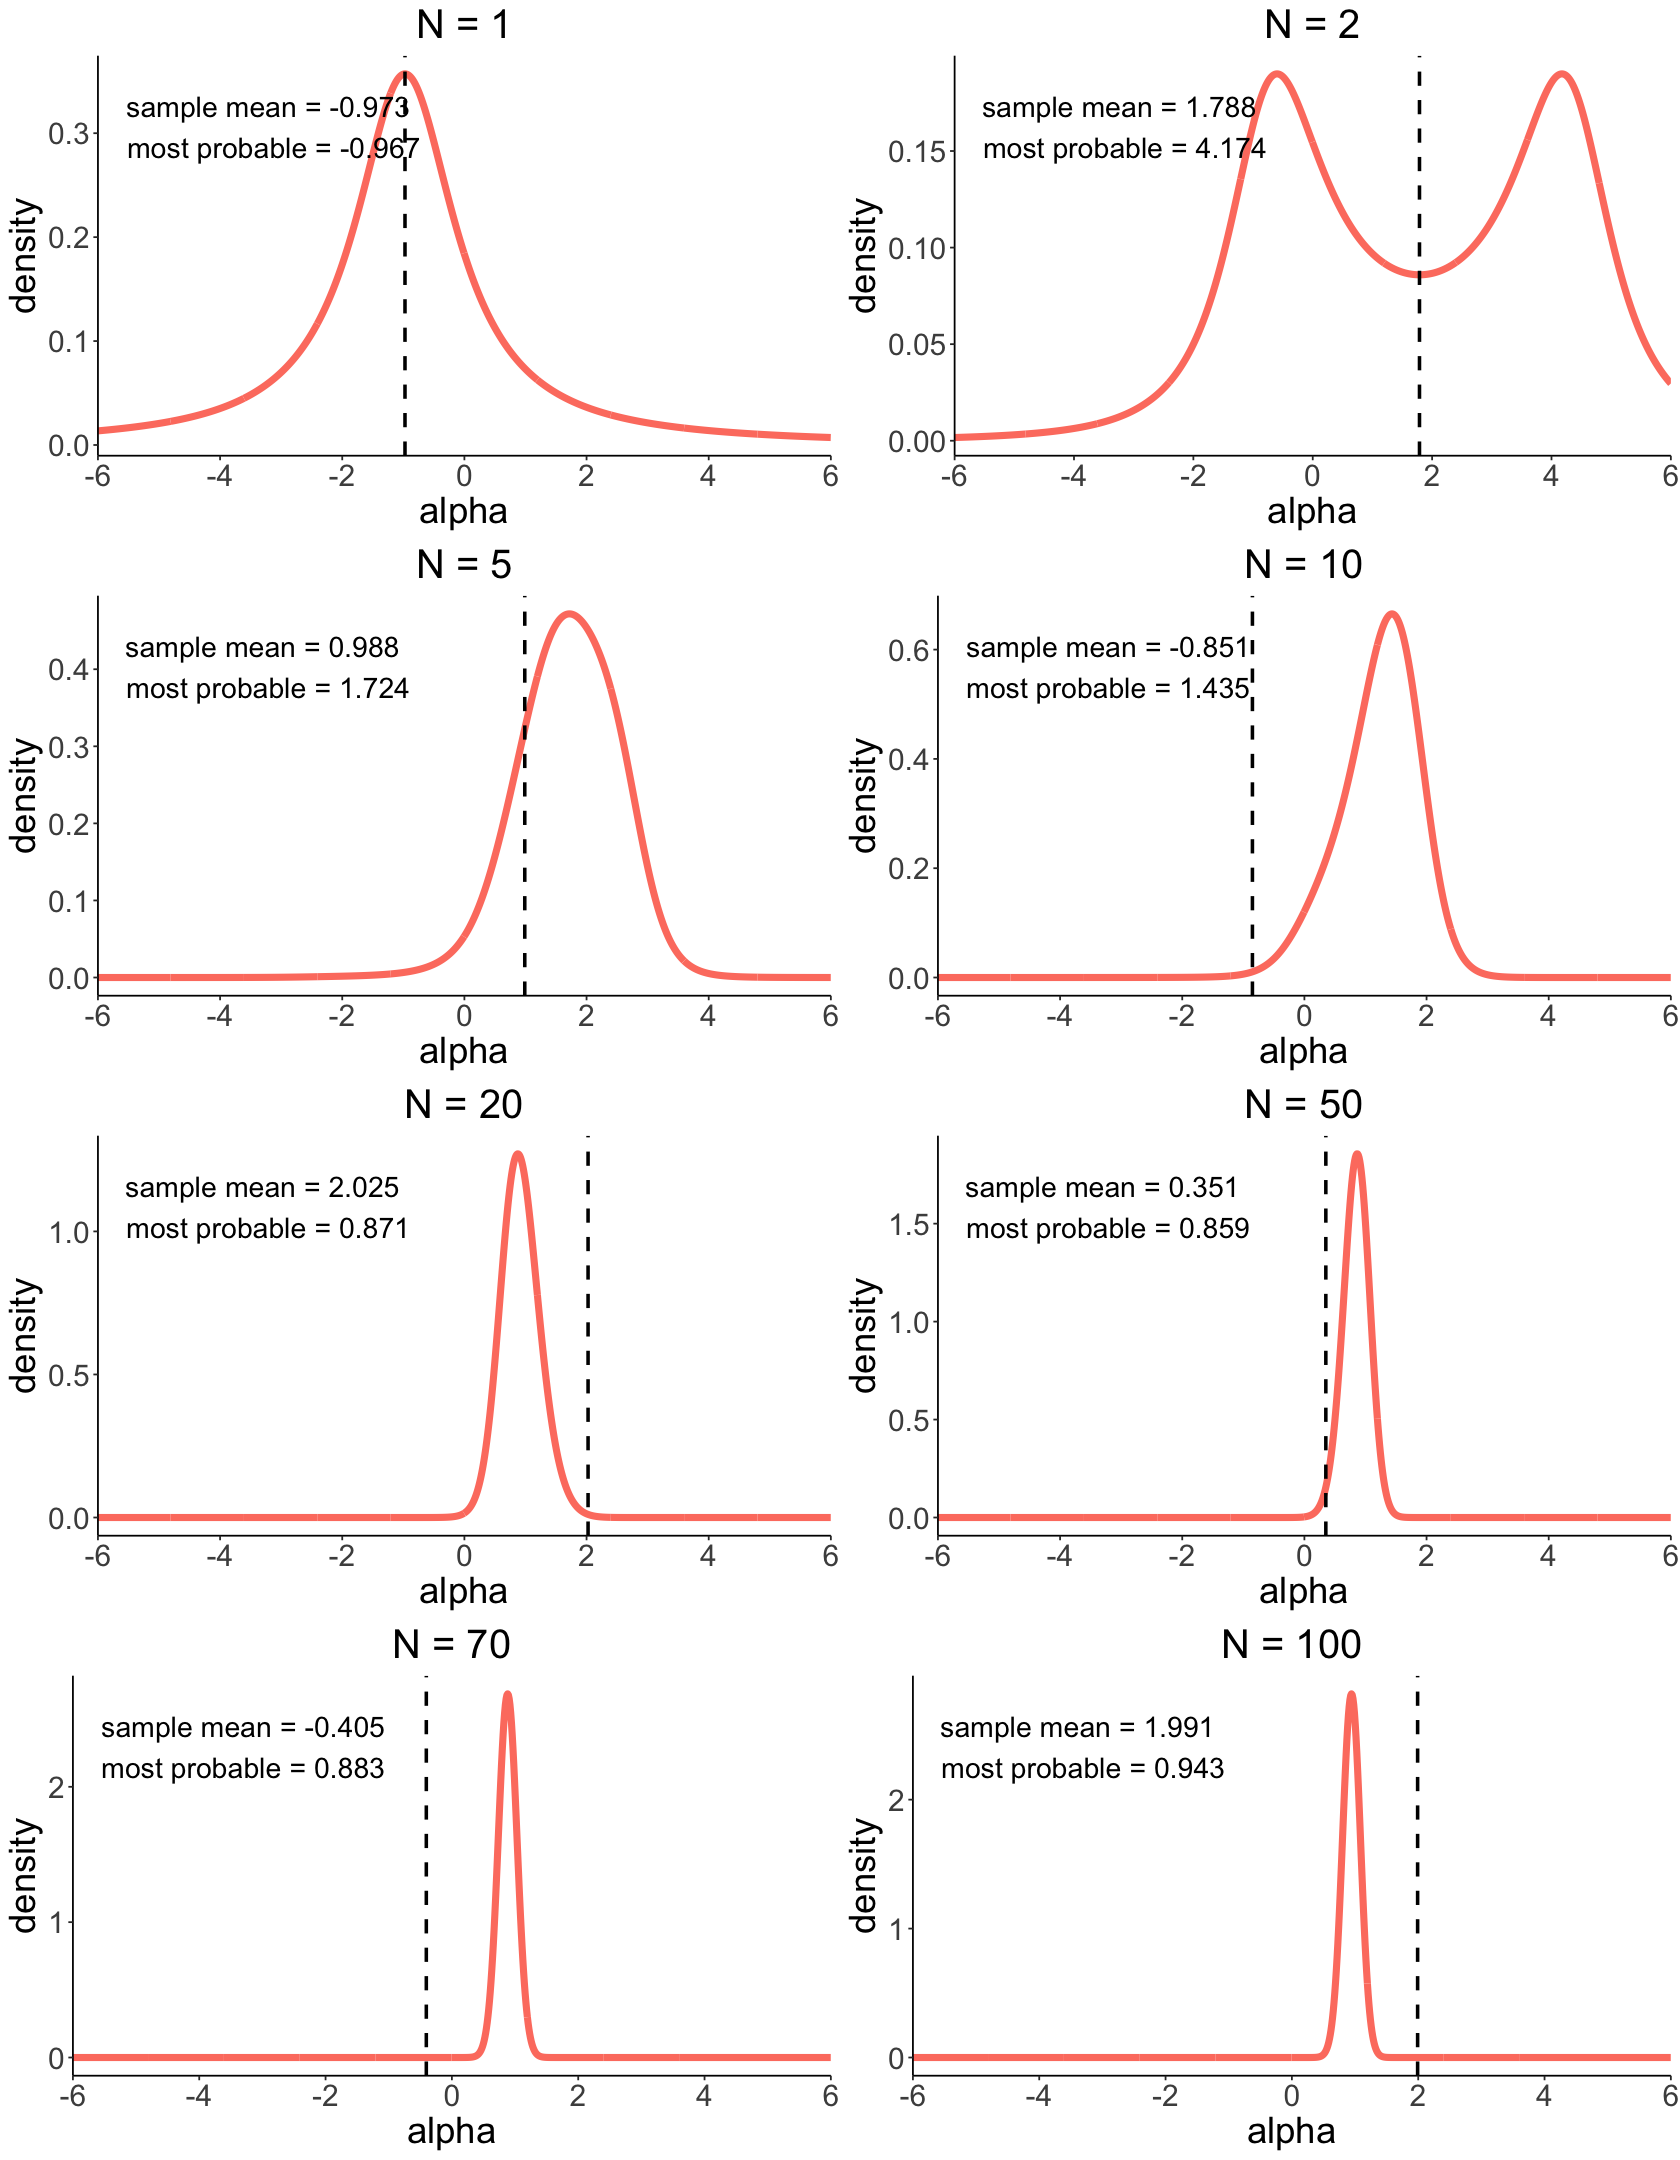

In [177]:
# number of flashes recorder
n_list <- c(1, 2, 5, 10, 20, 50, 70, 100)

# parameters
alpha_true <- 1
beta_fixed <- 1

# parameter we want to infer
a_grid <- 1000
a_min <- -6
a_max <- +6
h     <- (a_max - a_min) / a_grid
alpha <- seq(a_min, a_max, len = a_grid)

plots <- list()
i <- 1

# for each number of flashes recorded
for (n in n_list) {

    # generate data
    data <- rlighthouse(n, alpha_true, beta_fixed)

    # compute the log likelihood
    log_likelihood <- vector()
    for (a in alpha) {
        val <- sum(log(dcauchy(data, a, beta_fixed)))
        log_likelihood <- cbind(log_likelihood, val)
    }

    # compute the posterior assuming flat prior
    posterior_alpha_  <- exp(log_likelihood)
    posterior_alpha  <- posterior_alpha_ / (h * sum(posterior_alpha_))

    # get useful information from data and posterior
    alpha_max <- alpha[which.max(posterior_alpha)]
    x_mean <- mean(data)

    # PLOTS
    plt <- plot_posterior(
        parameter     = alpha,
        posterior = posterior_alpha,
        n_samples = n
    ) 
    
    plt <- plt + geom_vline(
        xintercept = x_mean,
        linetype = "dashed",
        size = 1,
        color = "black"
    ) +
    annotate(
        "text", 
        -Inf, 
        Inf, 
        label = glue("sample mean = {round(x_mean, 3)}"), 
        hjust = -0.1, 
        vjust = 3,
        size = 6
    ) +
    annotate(
        "text", 
        -Inf, 
        Inf, 
        label = glue("most probable = {round(alpha_max, 3)}"), 
        hjust = -0.1, 
        vjust = 5,
        size = 6
    )

    plots[[i]] <- ggplotGrob(plt)

    i <- i + 1
}

options(repr.plot.width = 14, repr.plot.height = 18)
ggarrange(plotlist = plots, ncol = 2, nrow = 4)
options(repr.plot.width = std_width, repr.plot.height = std_height)

## Exercise:

Now we study the case in which both the position along the shore ($\alpha$) and the distance out at sea ($\beta$) are unknown.

We assume that the joint prior is simply the product of the two prior distributions, as the two parameters do not affect each other in any way. Thus $P(\alpha,\,\beta)=P(\alpha)P(\beta)$. We also assume a flat prior on both parameters, since we have no meaningful insight of their distribution. 

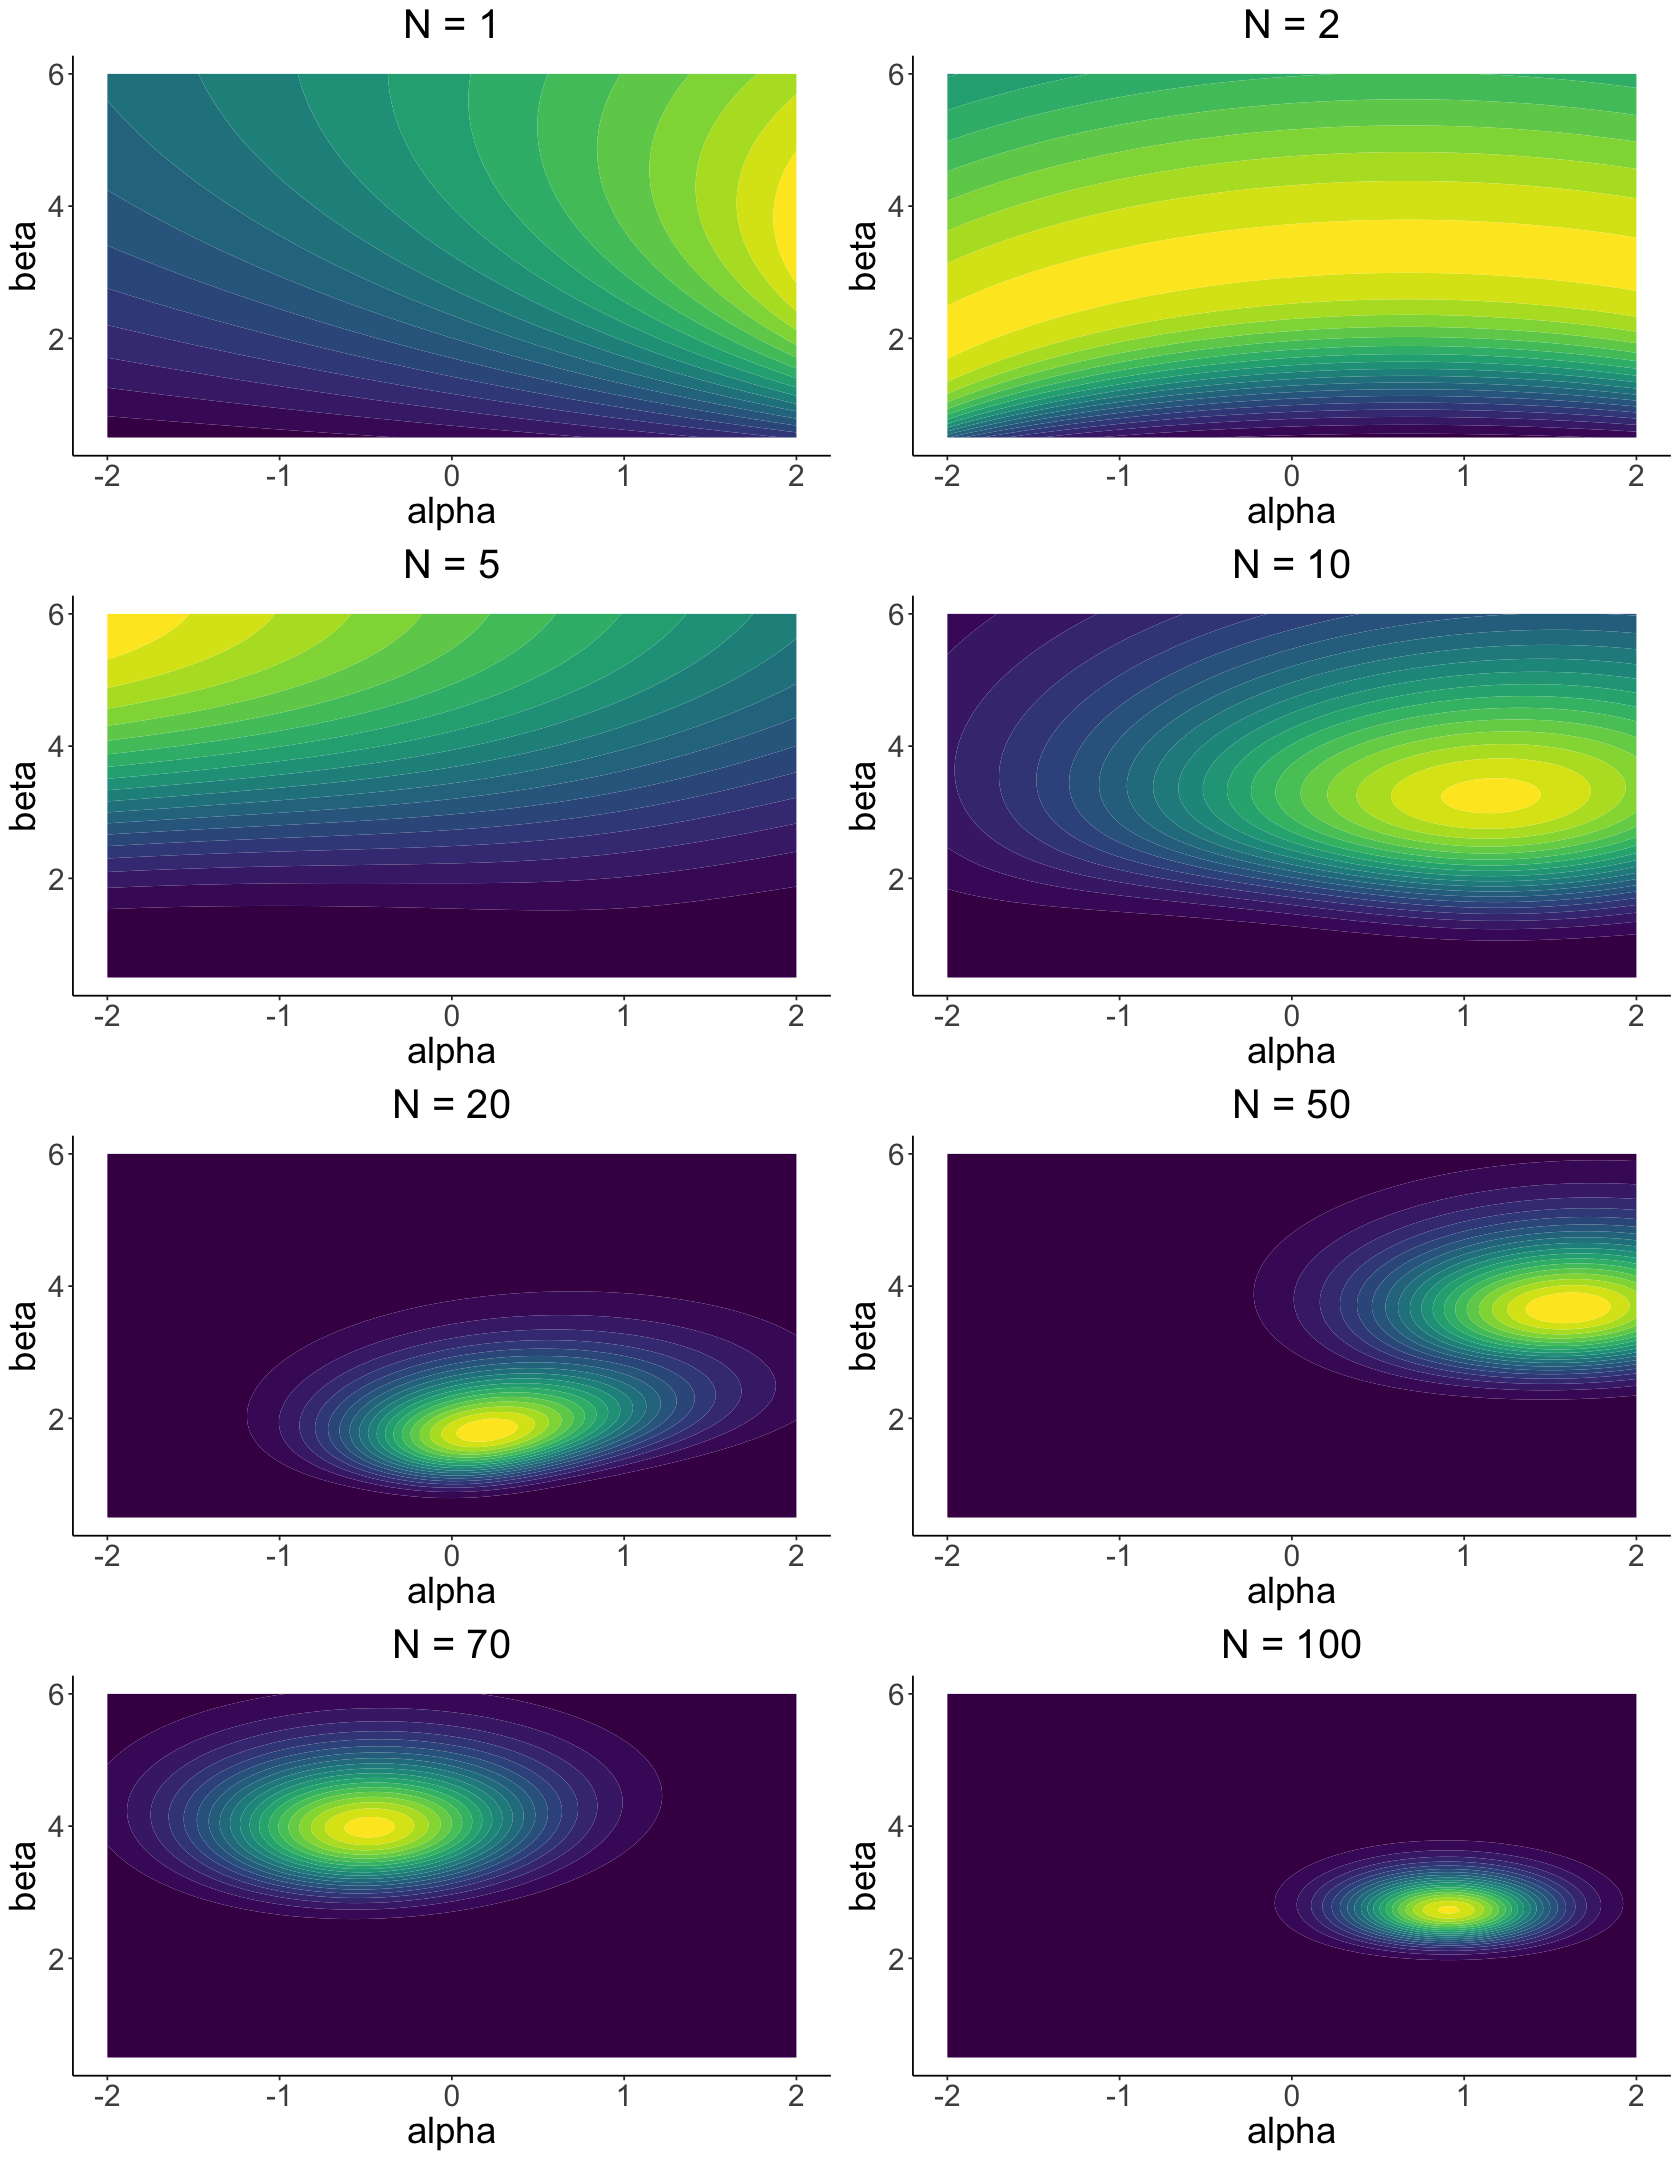

In [252]:
# number of flashes recorded
n_list <- c(1, 2, 5, 10, 20, 50, 70, 100)

# true parameters
alpha_true <- 1
beta_true  <- 3

# parameters we want to infer
a_grid <- 100
a_min  <- -2
a_max  <- +2
ha     <- (a_max - a_min) / a_grid
alpha  <- seq(a_min, a_max, len = a_grid)

b_grid <- 100
b_min  <- 0.5
b_max  <- 6
hb     <- (b_max - b_min) / b_grid
beta   <- seq(b_min, b_max, len = b_grid)


best_estimates <- vector()
a_history      <- vector()
b_history      <- vector()
plots          <- list()

par_grid <- expand_grid(a = alpha, b = beta)

i <- 1
# for each number of flashes recorded
for (n in n_list) {

    # generate data
    data <- rlighthouse(n, alpha_true, beta_true)

    # compute log-likelihood
    log_likelihood <- vector()
    for (b in beta) {
        for (a in alpha) {
            log_likelihood <- cbind(log_likelihood, sum(log(dcauchy(data, a, b))))
        }
    }

    # compute posterior
    posterior_  <- exp(log_likelihood)
    posterior   <- posterior_ / (ha * hb * sum(posterior_))
    posterior   <- matrix(posterior, nrow = a_grid, byrow = TRUE)

    df <- tibble(expand_grid(alpha, beta), melt(posterior)$value)
    colnames(df) <- c("alpha", "beta", "posterior")

    # parameter inference
    best_idx       <- which.max(df$posterior)
    best_estimates <- cbind(best_estimates, c(df[best_idx,]$alpha, df[best_idx,]$beta))
    a_history      <- cbind(a_history, colSums(posterior) * hb)
    b_history      <- cbind(b_history, rowSums(posterior) * ha)

    plt <- plot_posterior_2d(
        data = df,
        n_samples = n
    )

    plots[[i]] <- ggplotGrob(plt)

    i <- i + 1

}

# print(posterior_grid)
options(repr.plot.width = 14, repr.plot.height = 18)
ggarrange(plotlist = plots, ncol = 2, nrow = 4)
options(repr.plot.width = std_width, repr.plot.height = std_height)

For $n=100$ observations we also study the marginalized posteriors and get the estimates of the two parameters.

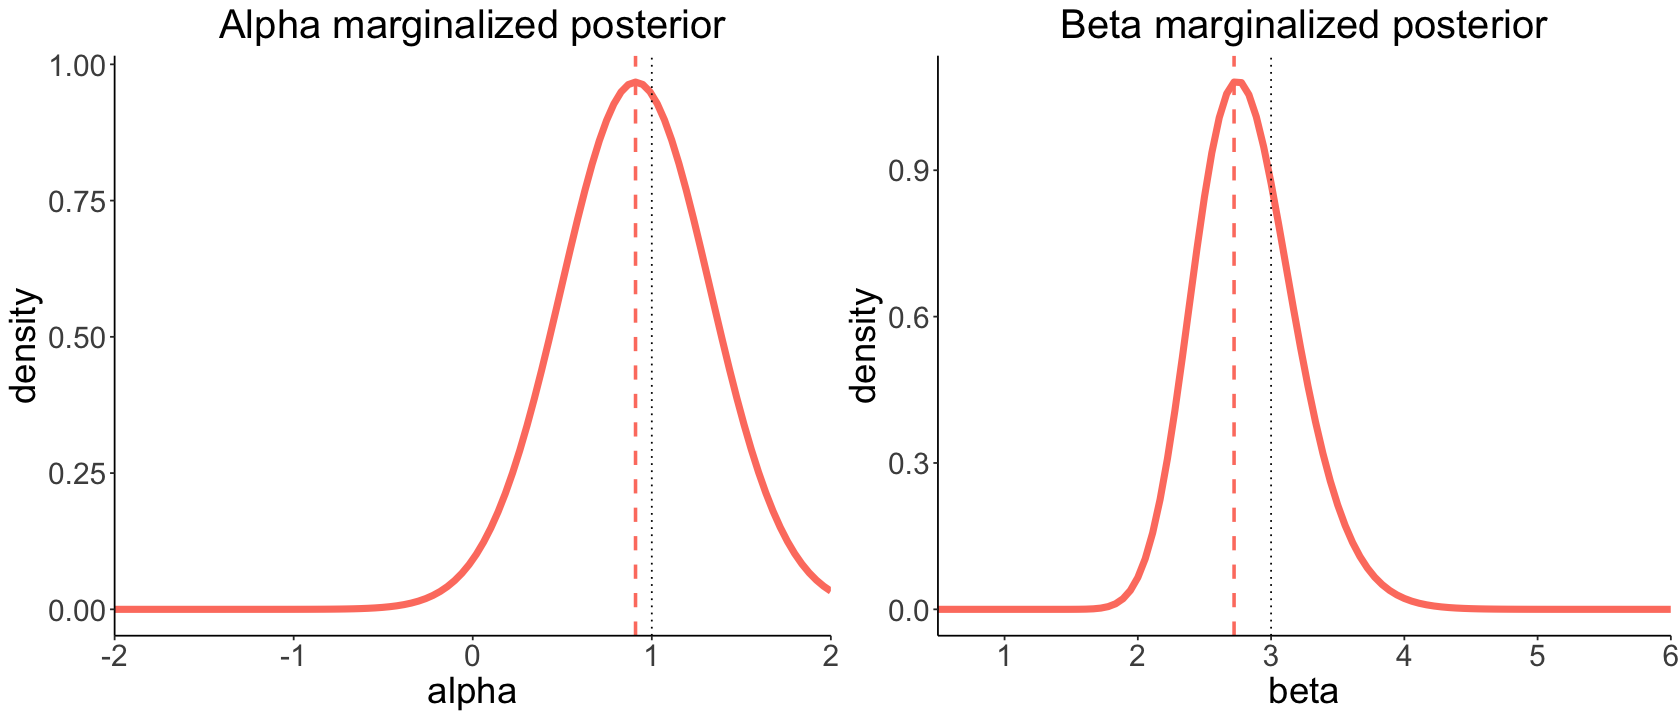

In [254]:
posterior_alpha <- a_history[, 8]
posterior_beta  <- b_history[, 8]

alpha_best <- best_estimates[1, 8]
beta_best  <- best_estimates[2, 8]

plt_a <- plot_posterior(
    parameter = alpha,
    posterior = posterior_alpha,
    n_samples = n,
    xmin = -2,
    xmax = 2
)

plt_a <- plt_a + geom_vline(
    xintercept = alpha_best,
    linetype = "dashed",
    size = 1,
    color = colors[1]
) + 
geom_vline(
    xintercept = alpha_true,
    linetype = "dotted",
    size = 0.5,
    color = "black"
) + 
labs(title = "Alpha marginalized posterior")



plt_b <- plot_posterior(
    parameter = beta,
    posterior = posterior_beta,
    n_samples = n,
    xmin = 0.5,
    xmax = 6,
    xlab = "beta"
)

plt_b <- plt_b + geom_vline(
    xintercept = beta_best,
    linetype = "dashed",
    size = 1,
    color = colors[1]
) + 
geom_vline(
    xintercept = beta_true,
    linetype = "dotted",
    size = 0.5,
    color = "black"
) + 
labs(title = "Beta marginalized posterior")

plots <- list(plt_a, plt_b)

options(repr.plot.width = 14, repr.plot.height = 6)
ggarrange(plotlist = plots, ncol = 2, nrow = 1)
options(repr.plot.width = std_width, repr.plot.height = std_height)

---

# Exercise 3 - Signal over Background

Given the signal over background example discussed last week, analyze and discuss the following cases:

A) Vary the sampling resolution used to generate the data, keeping the same sampling range
- Check the effect on the results


B) Change the ratio $A/B$ used to simulate the data (keeping both positive in accordance with the prior)
- Check the effect on the results

## Framework

The number $\{N_k\}$ of photons measured at positions $\{x_k\}$ is a Poisson random variable:

$$
P(N|S) = \frac{S^N e^{-S}}{N!}
$$

where:

$$
S_k = \Delta t \left[A \exp\left( - \frac{(x_k - x_0)^2}{2w^2} \right) + B\right] \tag{1}
$$

and $\Delta t$ is the **exposure time**, $x_0$ and $w$ are the **centre** and **width** of the signal peak, $A$ and $B$ are the signal and background **amplitudes**. 

The *likelihood* of the data $D = \{N_k\}$ is given by:

$$
P(D|A,B,M) = \prod_{j} \frac{S_k^{N_k} e^{-S_k}}{N_k!}
$$

Assuming a *uniform prior* over $A, B > 0$, the *posterior* is:

$$ 
P(A, B|D,M) = \frac{1}{Z} \prod_j \frac{S_k^{N_k} e^{-S_k}}{N_k!}
$$

where $Z$ is the normalization factor. The *log posterior* is then:

$$
L = \log P(A,B|D,M) = \text{const.} + \sum_k [N_k \log S_k - S_k]
$$

In [195]:
# this function generates noisy data
data_generator <- function(x, a, b, x0, w, t) {
    return(t * (a * exp(-1 * (x - x0)^2 / (2 * w^2)) + b))
}

In [4]:
sig_bkg_plot <- function(
    xhist,
    yhist,
    xline,
    yline,
    title = "Signal + background counts",
    xlab = "x",
    ylab = "counts",
    legend = TRUE
) {
    plt <- ggplot() +
    geom_col(
        aes(x = xhist, y = yhist, fill = "observed"),
        color    = "white",
        show.legend = legend
    ) +
    geom_line(
        aes(x = xline, y = yline, color = "true"),
        size  = 2,
        show.legend = legend
    ) +
    theme_classic() +
    theme(
        plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
        axis.title   = element_text(size = fontsize),
        axis.text    = element_text(size = fontsize - 4),
        legend.title = element_text(size = fontsize),
        legend.text  = element_text(size = fontsize - 4),
    ) +
    labs(
        title = title,
        x     = xlab,
        y     = ylab,
        color = "",
        fill  = ""
    ) +
    scale_y_continuous(limits = c(0, NA), expand = c(0, NA)) +
    scale_x_continuous(breaks = pretty_breaks()) +
    scale_color_manual(name = "", values = c(
            "true" = colors[1]
        )
    ) +
    scale_fill_manual(name = "", values = c(
            "observed" = colors[2]
        )
    )

    return(plt)
}

In [151]:
# parameters
x0      <- 0
w       <- 1
a_true  <- 3
b_true  <- 1
delta_t <- 5

# data
xdat   <- seq(from = -7 * w, to = 7 * w, by = 0.5 * w)
s_true <- data_generator(xdat, a_true, b_true, x0, w, delta_t)
ddat   <- rpois(length(s_true), s_true)

# data for smooth plotting
x_grid <- seq(from = min(xdat), to = max(xdat), by = 0.05 * w)
s_plot <- data_generator(x_grid, a_true, b_true, x0, w, delta_t)

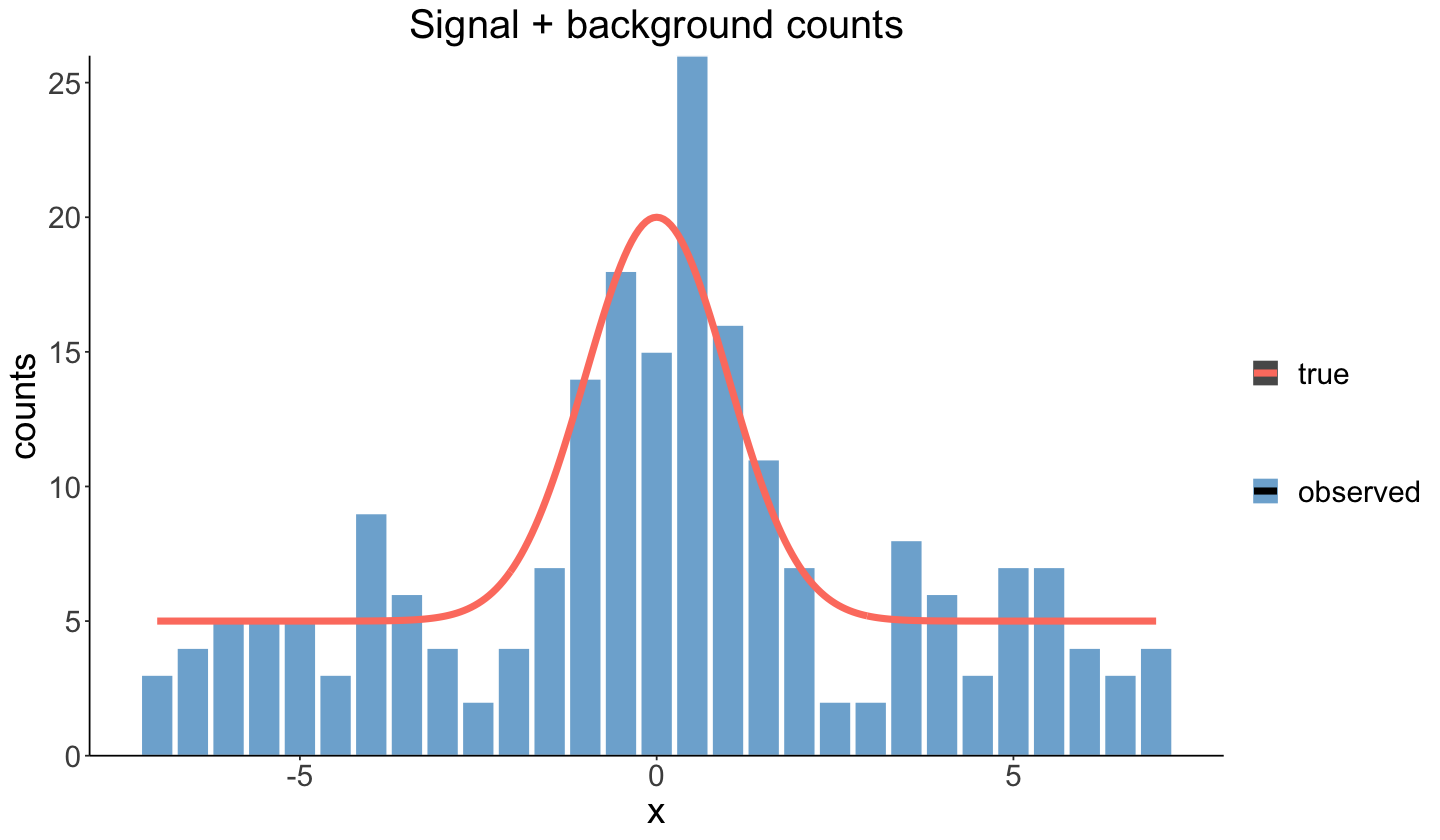

In [152]:
plt <- sig_bkg_plot(xdat, ddat, x_grid, s_plot)

plt

## A)

Here we change the sampling resolution, that is $r \times w$ where $r$ is a constant factor and $w$ is the width of the peak.

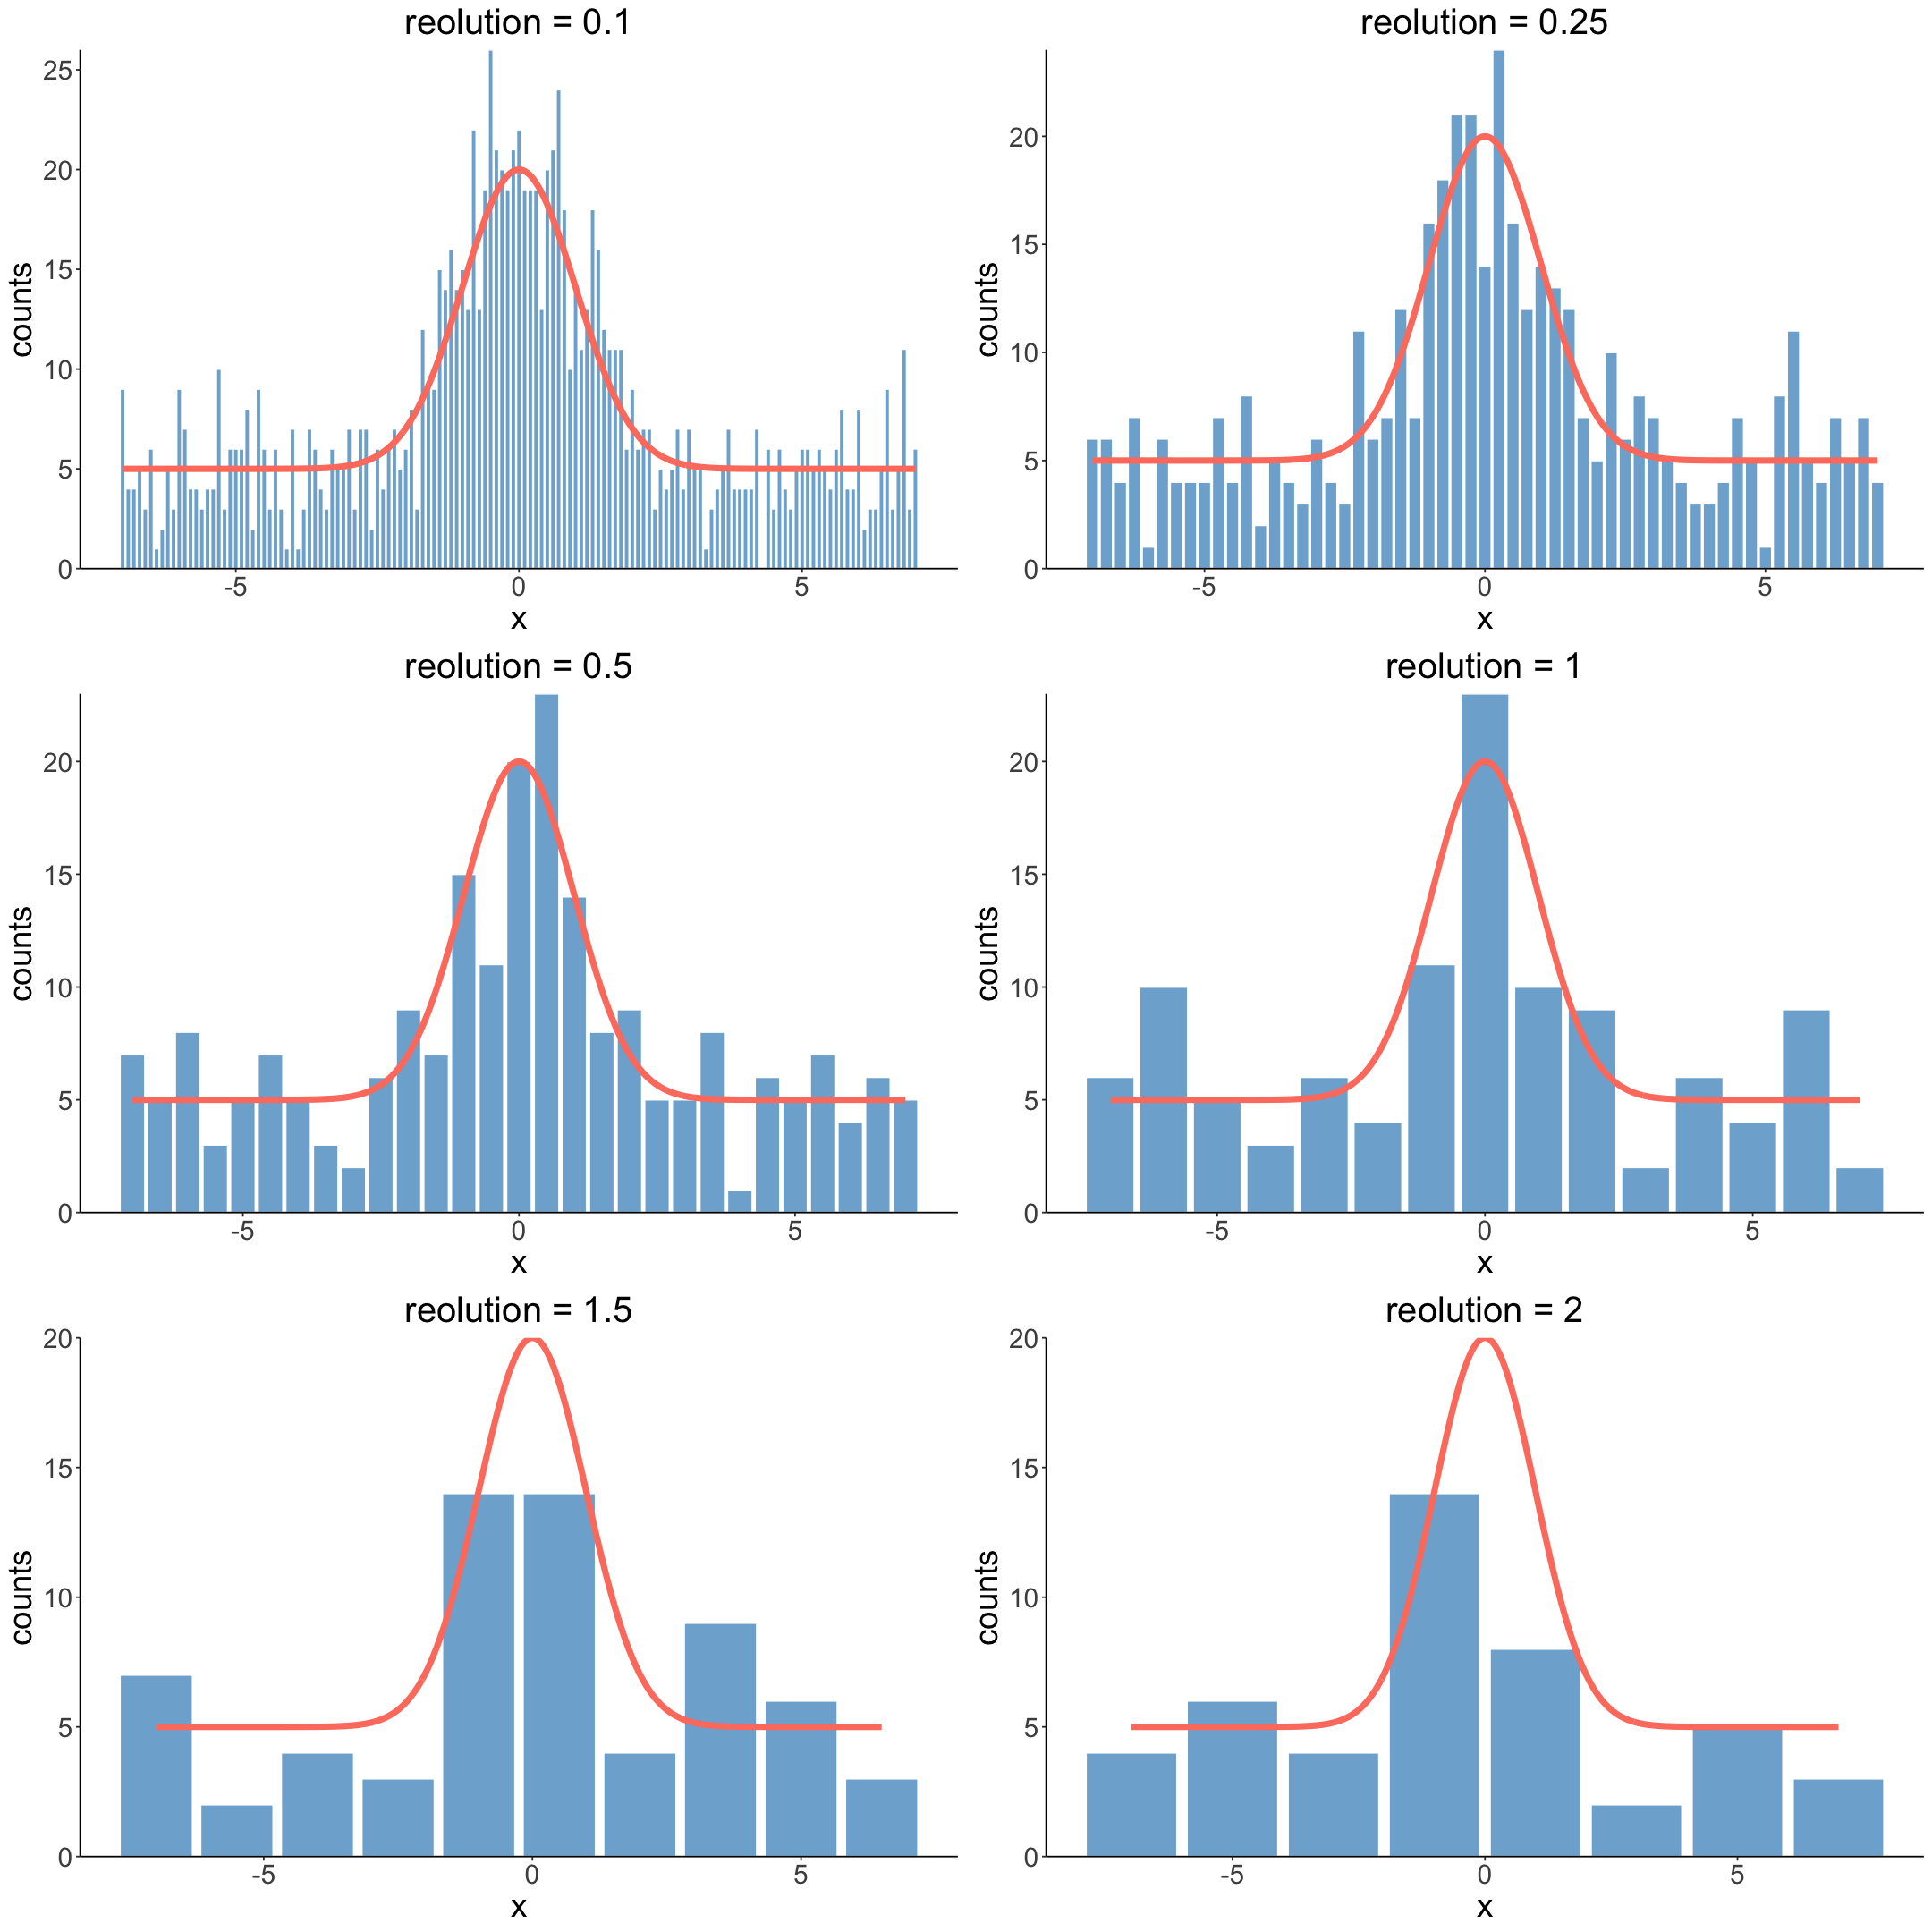

In [153]:
# list of resolution modifiers
r_list <- c(0.1, 0.25, 0.5, 1, 1.5, 2)
w <- 1

plots <- list()
i <- 1
# for each resolution r*w
for (r in r_list) {

    # generate data with the proper resolution r*w
    xdat   <- seq(from = -7 * w, to = 7 * w, by = r * w)
    s_true <- data_generator(xdat, a_true, b_true, x0, w, delta_t)
    ddat   <- rpois(length(s_true), s_true)

    # smooth plotting 
    x_grid <- seq(from = min(xdat), to = max(xdat), by = 0.05 * w)
    s_plot <- data_generator(x_grid, a_true, b_true, x0, w, delta_t)

    plt <- sig_bkg_plot(
        xdat,
        ddat,
        x_grid,
        s_plot,
        title = glue("reolution = {r*w}"),
        legend = FALSE
    )

    plots[[i]] <- ggplotGrob(plt)

    i <- i + 1
}

options(repr.plot.width = 18, repr.plot.height = 18)
ggarrange(plotlist = plots, ncol = 2, nrow = 3)
options(repr.plot.width = std_width, repr.plot.height = std_height)

In [154]:
# this function computes the log likelihood in a vectorized fashion: way faster than the matrix approach!
compute_log_likelihood <- function(data, x, a, b, x0, w, t) {

    grid_val <- expand.grid(x, a, b)

    lambdas  <- mapply(
        data_generator, 
        x  = grid_val[, 1], 
        a  = grid_val[, 2], 
        b  = grid_val[, 3], 
        x0 = x0, 
        w  = w, 
        t  = t
    )
    n_points <- length(a) * length(b)
    res <- rowsum(
            dpois(
                rep(data, n_points), 
                lambda = lambdas, 
                log    = TRUE
            ), 
            rep(seq(1:n_points), 
            each = length(data)
        )
    )
    return(matrix(res, nrow = length(a)))
}

compute_mean_std <- function(x, post, dx) {
    mean <- sum(x * post) * dx
    std <- sqrt(
        sum(x^2 * post) * dx - mean^2
    )
    result <- c(mean, std)
    return(result)
}

compute_cov <- function(a, a_mean, a_std, da, b, b_mean, b_std, db, post) {
    rho <- 0
    for (i in length(a)) {
        for (j in length(b)) {
            rho <- rho + (a[i] - a_mean) * (b[j] - b_mean) * post[i, j]
        }
    }
    rho <- da * db * rho / (a_std * b_std)

    return(rho)
}

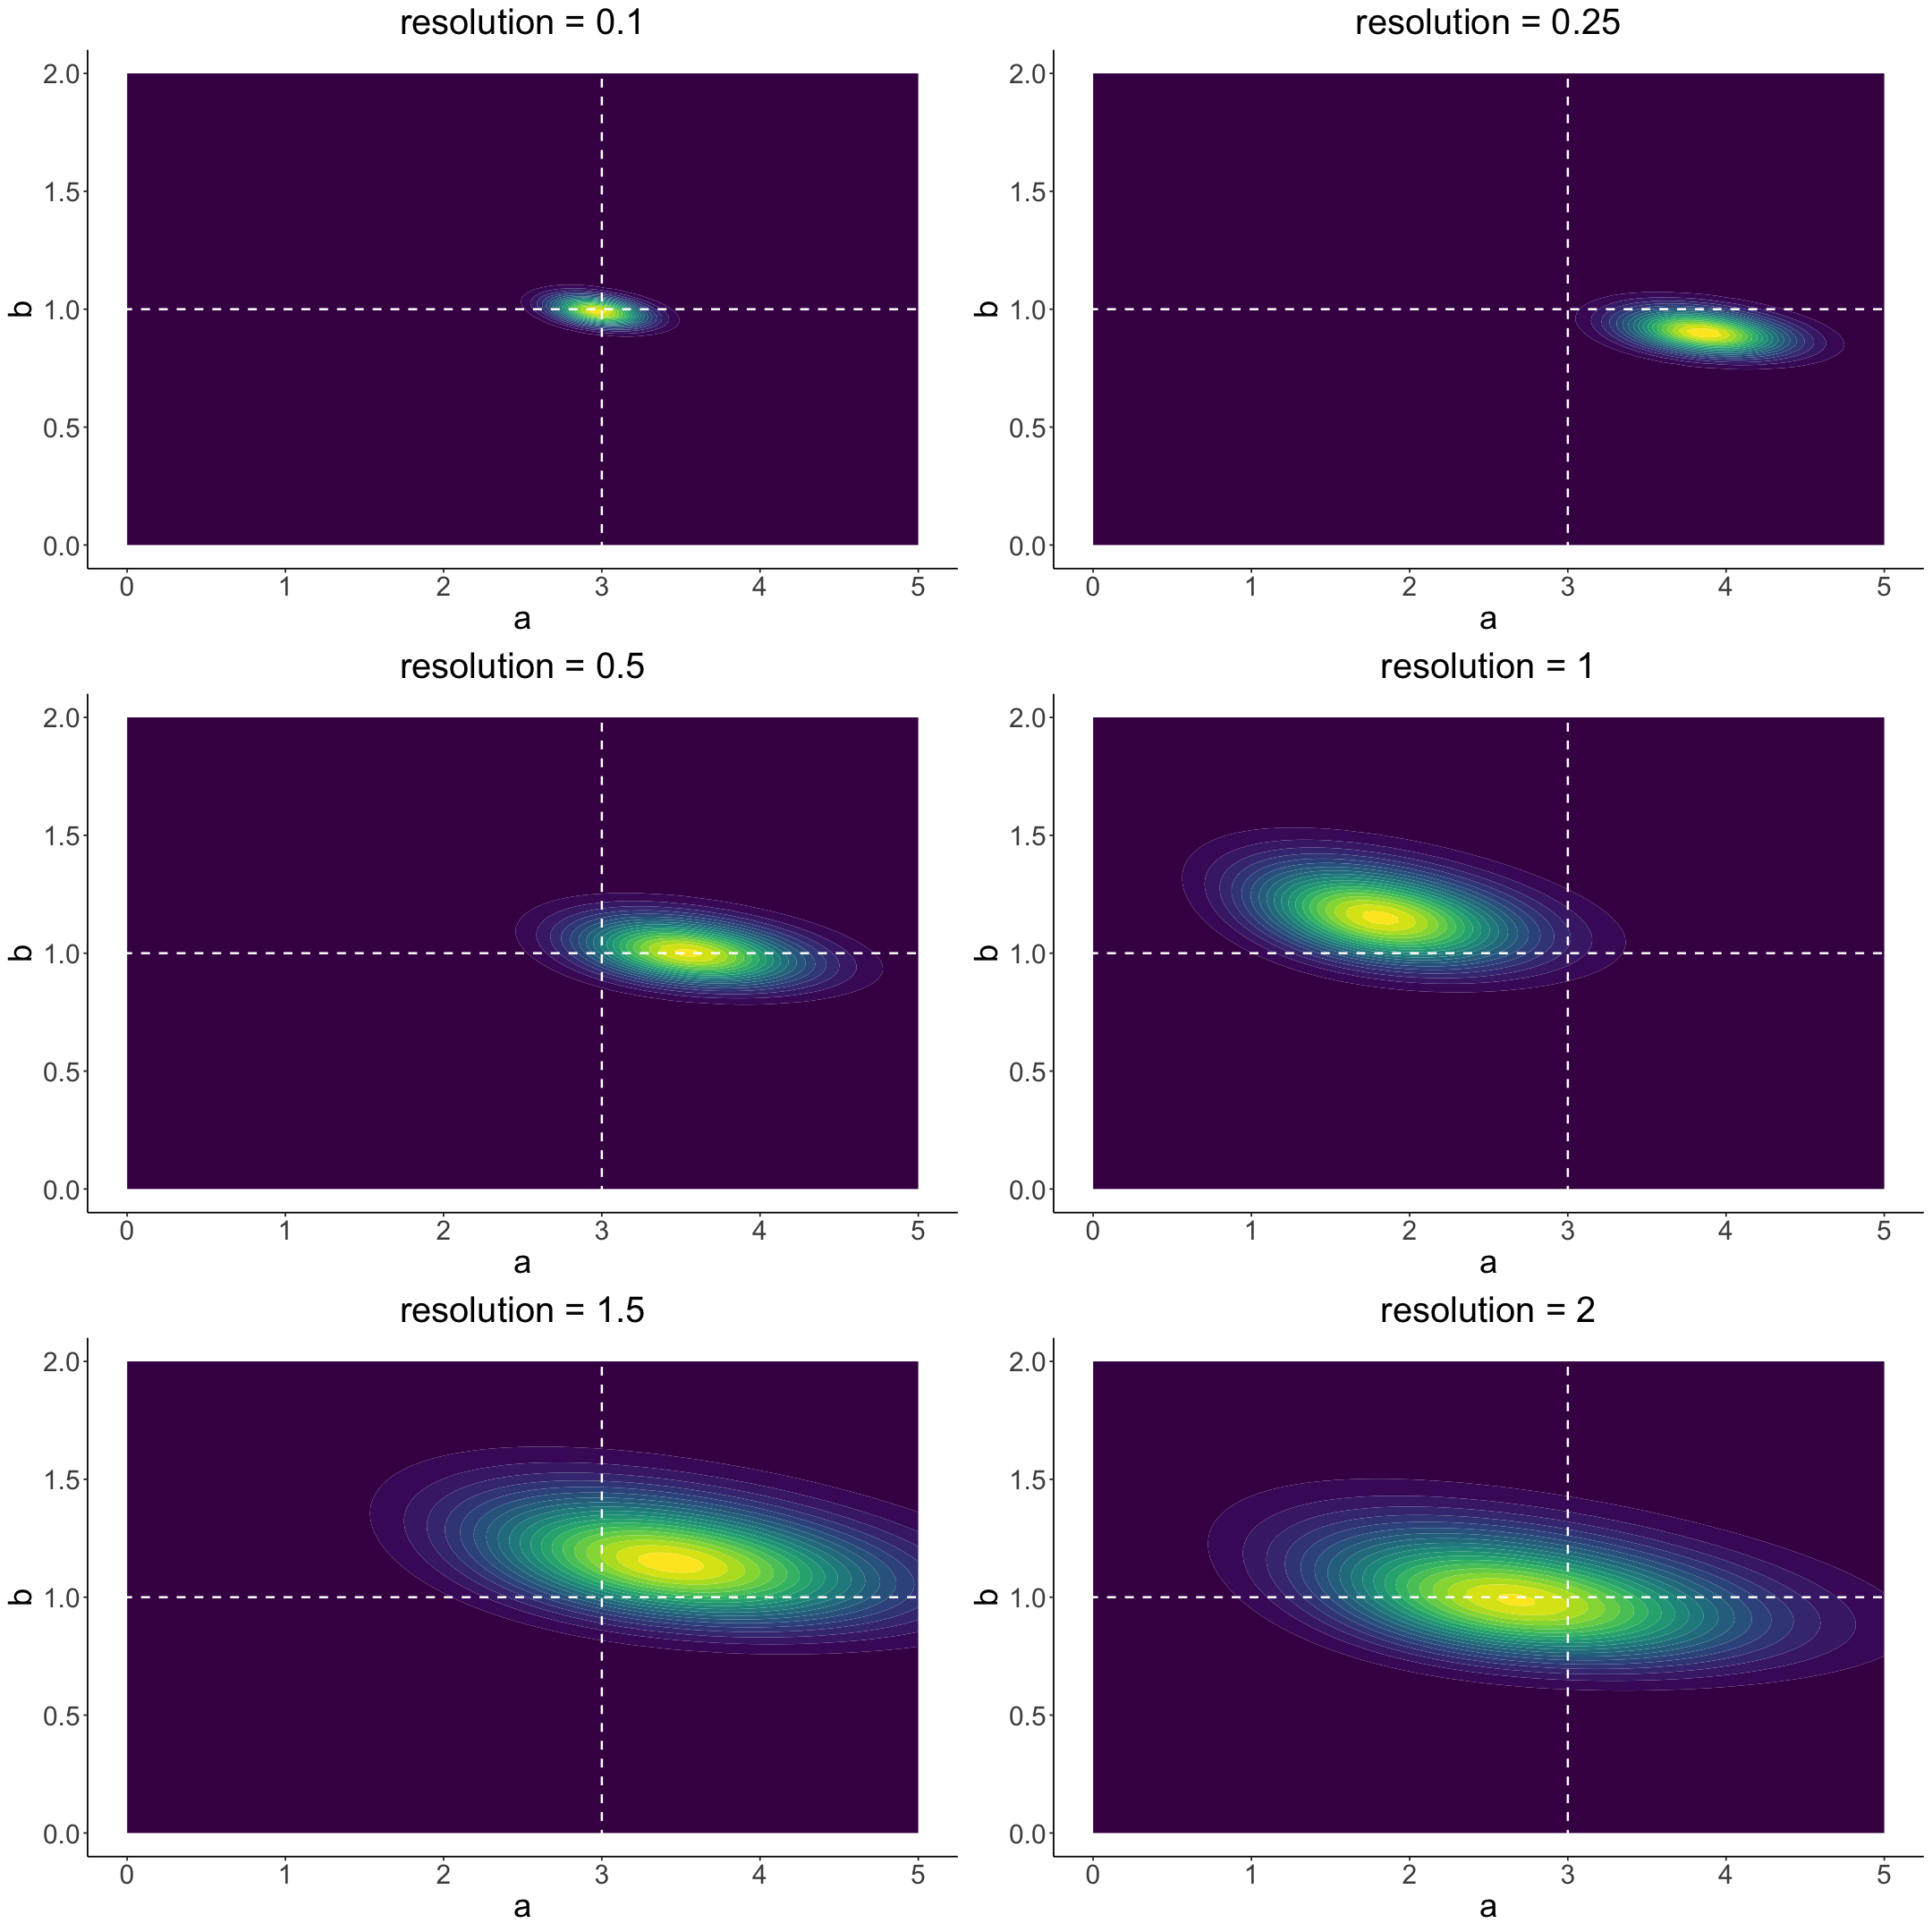

In [157]:
# parameters we want to infer
a_min <- 0
a_max <- 5
n_a   <- 100
da    <- (a_max - a_min) / n_a
a <- seq(a_min, a_max, len = n_a)

b_min <- 0
b_max <- 2
n_b   <- 100
db    <- (b_max - b_min) / n_b
b <- seq(b_min, b_max, len = n_b)


best_estimates <- vector()
a_history      <- vector()
b_history      <- vector()
r_history      <- vector()
plots          <- list()

i <- 1
# for each resolution r*w
for (r in r_list) {

    # generate data with the appropriate resolution
    xdat   <- seq(from = -7 * w, to = 7 * w, by = r * w)
    s_true <- data_generator(xdat, a_true, b_true, x0, w, delta_t)
    ddat   <- rpois(length(s_true), s_true)

    # compute the log likelihood
    log_likelihood <- compute_log_likelihood(ddat, xdat, a, b, x0, w, delta_t)

    # compute the posterior
    posterior_  <- exp(log_likelihood)
    posterior   <- posterior_ / (da * db * sum(posterior_))
    posterior   <- matrix(posterior, nrow = n_a, byrow = TRUE)

    df <- tibble(expand_grid(a, b), melt(posterior)$value)
    colnames(df) <- c("a", "b", "posterior")


    best_idx <- which.max(df$posterior)

    a_post <- colSums(posterior) * db
    a_mean <- compute_mean_std(a, a_post, da)[1]
    a_std  <- compute_mean_std(a, a_post, da)[2]

    b_post <- rowSums(posterior) * da
    b_mean <- compute_mean_std(b, b_post, db)[1]
    b_std  <- compute_mean_std(b, b_post, db)[2]

    best_estimates <- cbind(best_estimates, c(a_mean, a_std, b_mean, b_std))

    a_history      <- cbind(a_history, a_post)
    b_history      <- cbind(b_history, b_post)
    r_history      <- cbind(r_history, compute_cov(a, a_mean, a_std, da, b, b_mean, b_std, db, posterior))


    plt <- plot_posterior_2d(
        data = df,
        col1 = "a",
        col2 = "b",
        col3 = "posterior",
        xlab = "a",
        ylab = "b",
        zlab = "density",
        title = glue("resolution = {r*w}")
    )

    plt <- plt + 
    geom_vline(
        xintercept = a_true,
        color = "white",
        size = 0.7,
        linetype = "dashed"
    ) +
    geom_hline(
        yintercept = b_true,
        color = "white",
        size = 0.7,
        linetype = "dashed"
    )
    plots[[i]] <- ggplotGrob(plt)
    i <- i + 1

}

options(repr.plot.width = 18, repr.plot.height = 18)
ggarrange(plotlist = plots, ncol = 2, nrow = 3)
options(repr.plot.width = std_width, repr.plot.height = std_height)

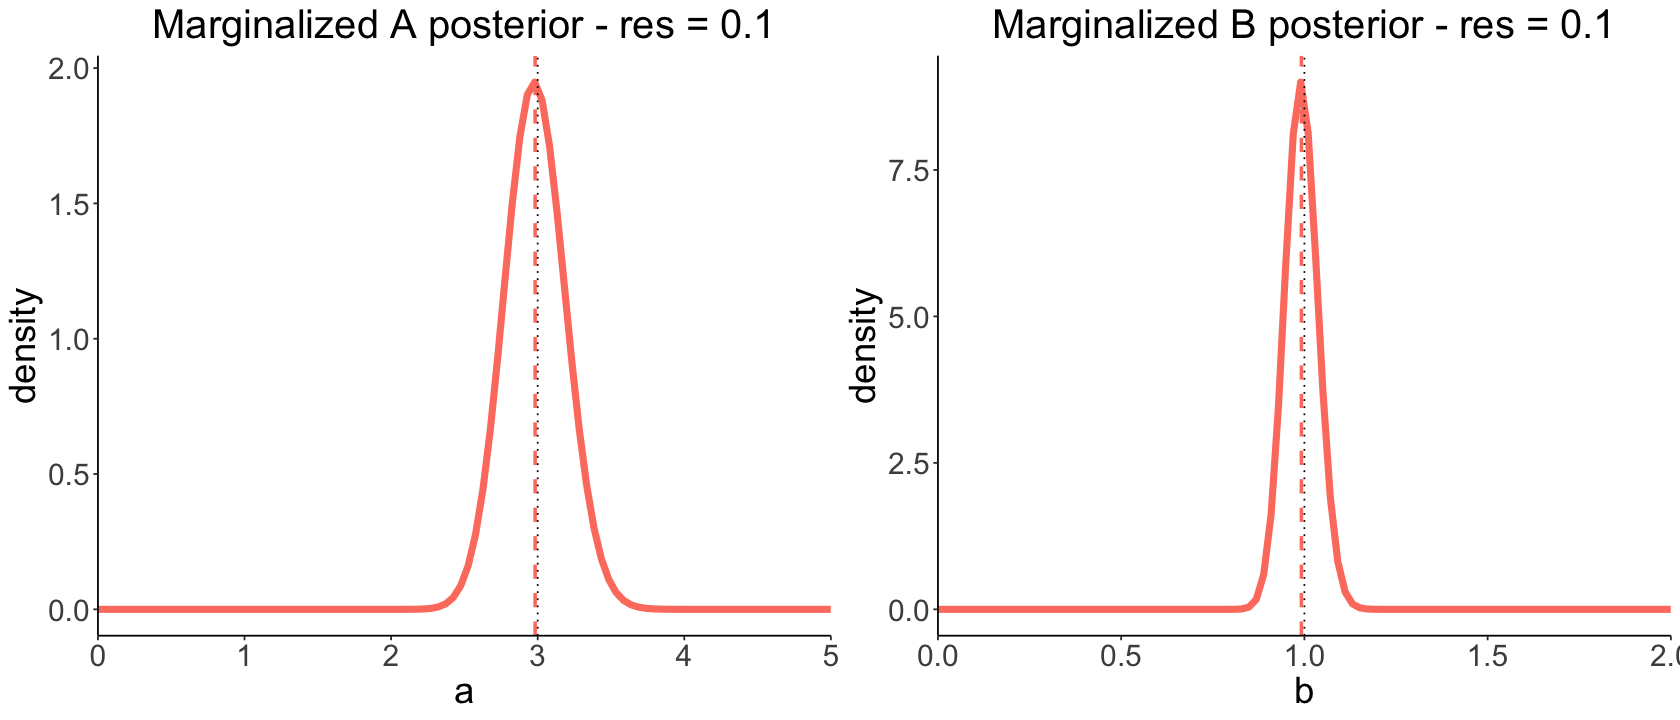

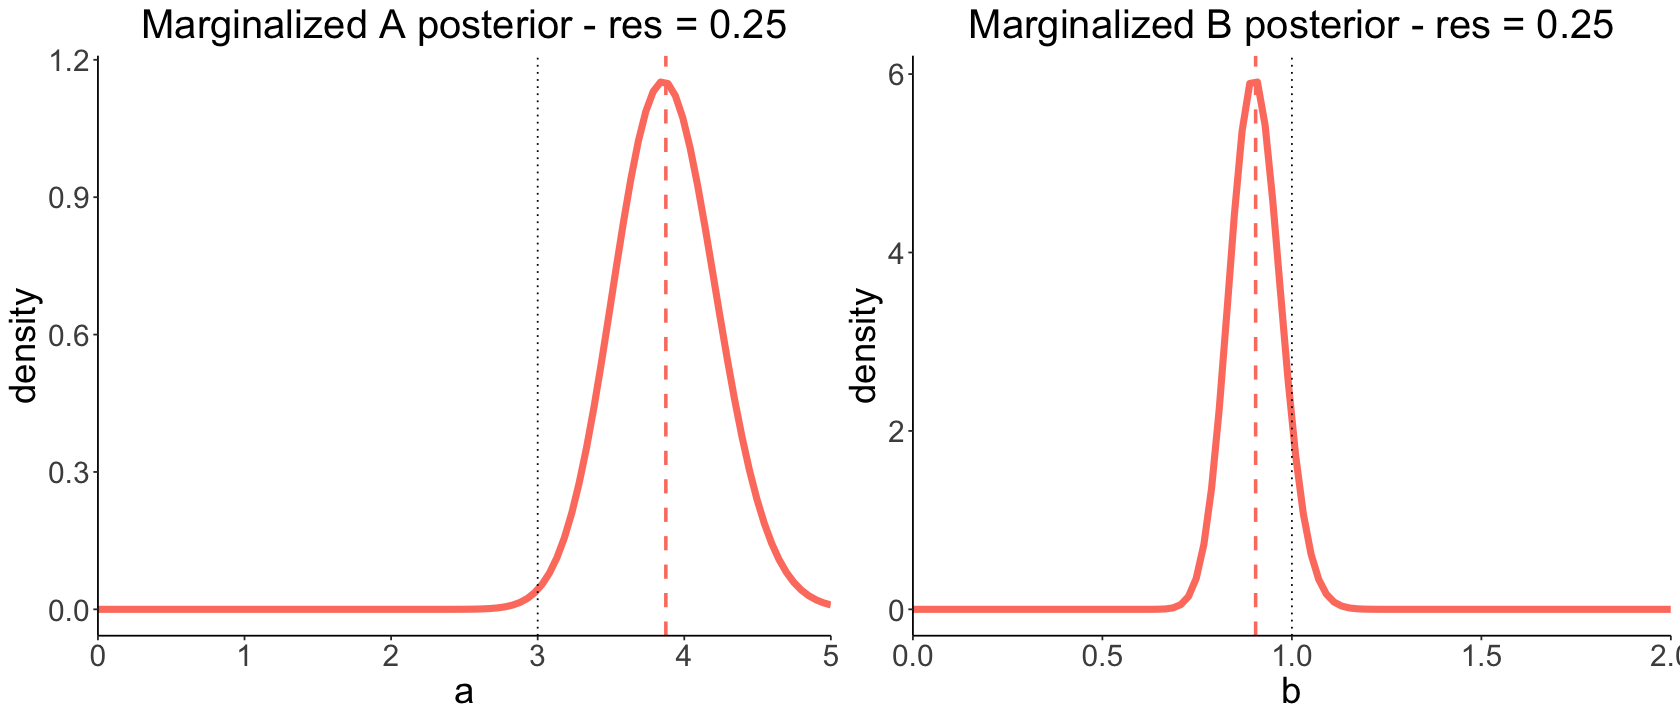

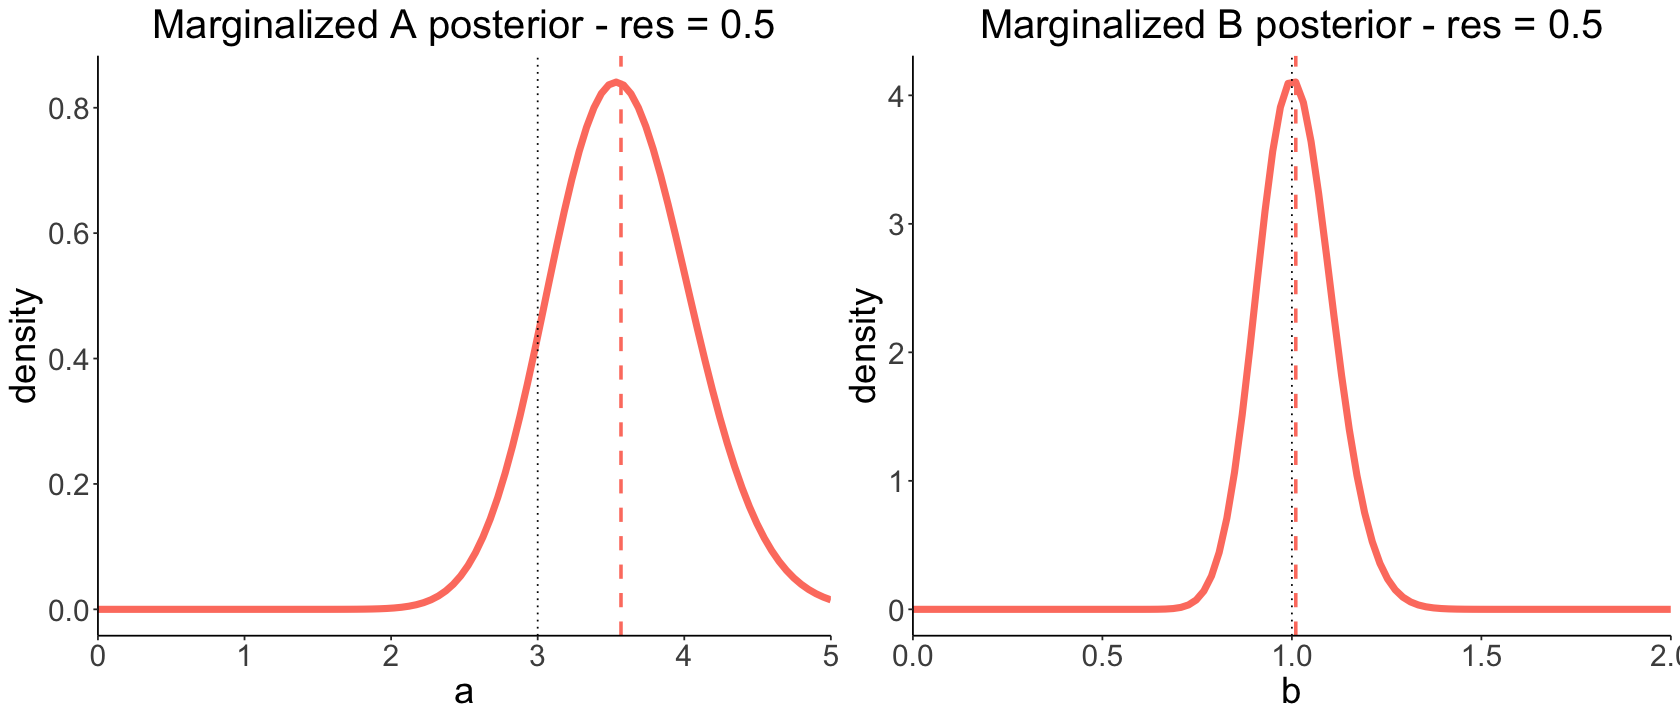

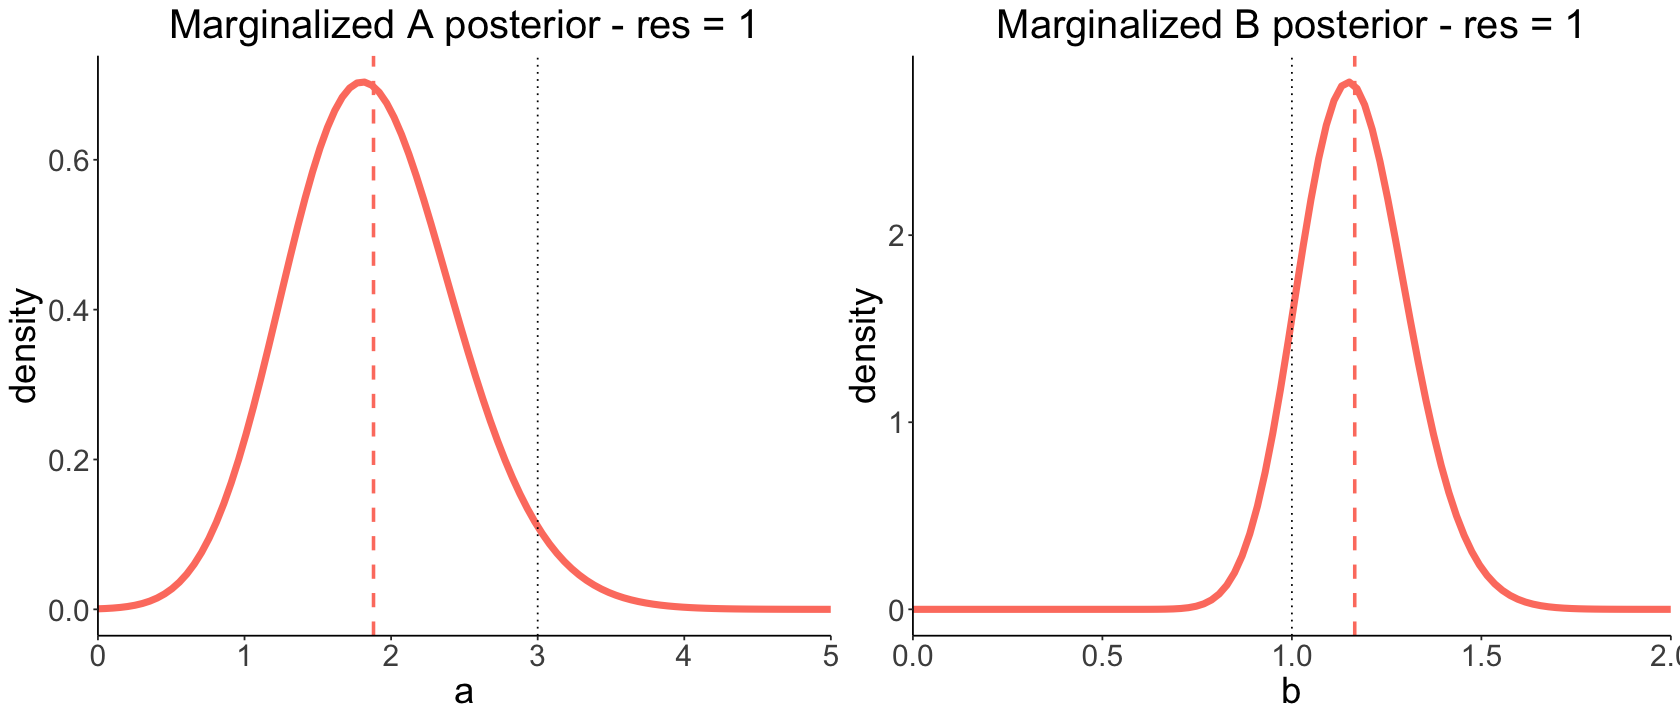

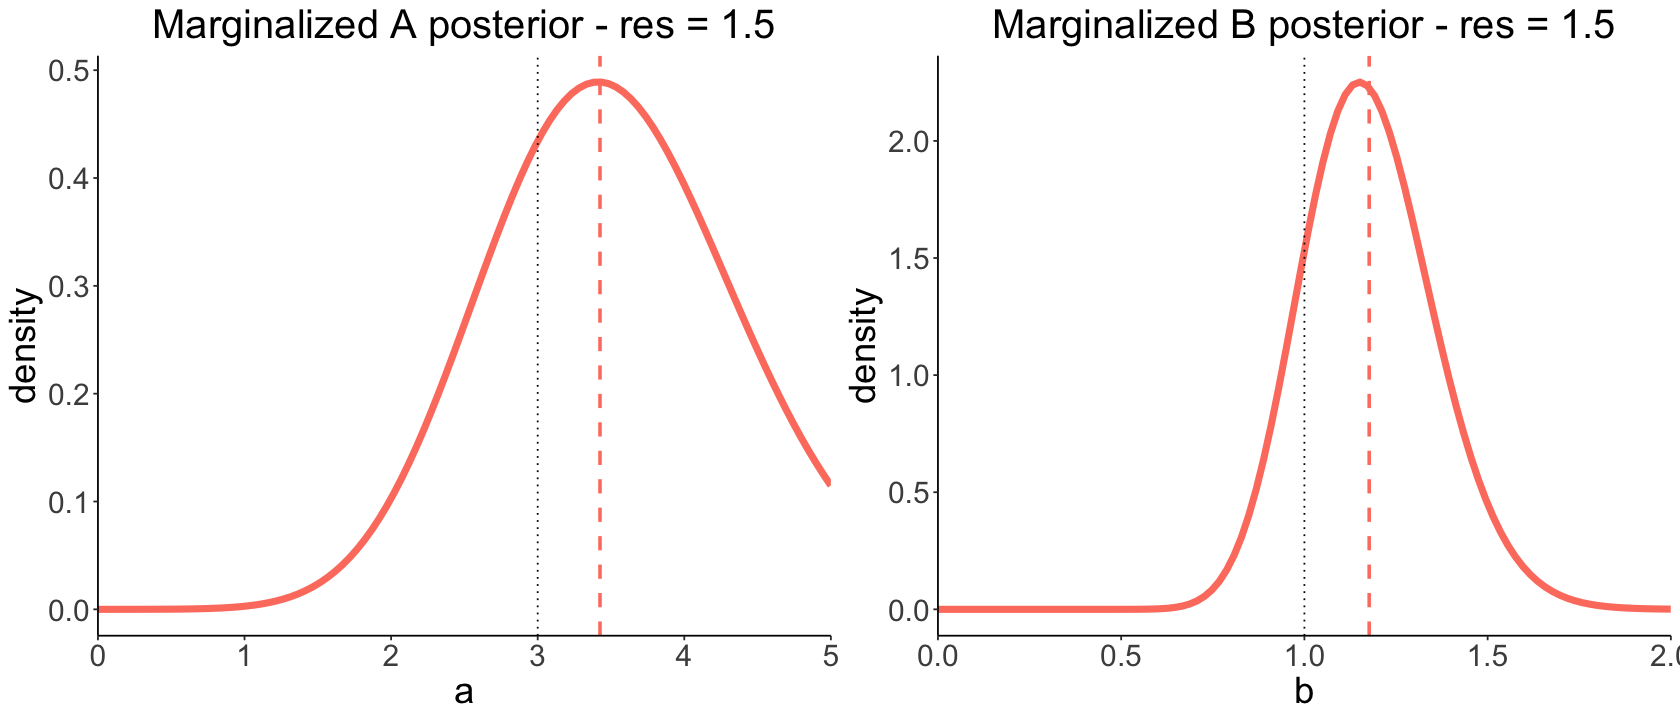

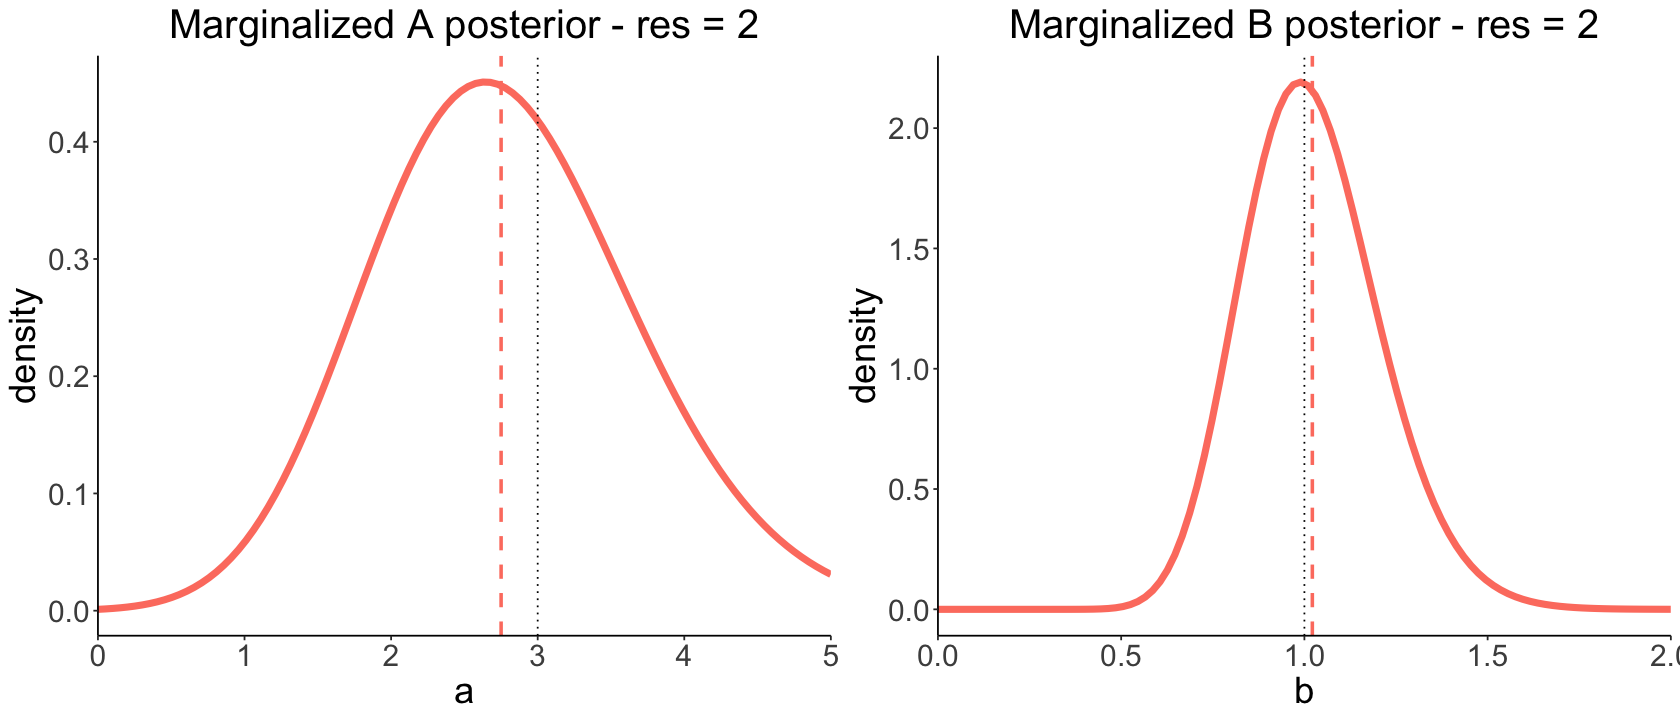

In [158]:
a_means <- best_estimates[1, ]
a_stds  <- best_estimates[2, ]
b_means <- best_estimates[3, ]
b_stds  <- best_estimates[4, ]

for (i in 1:length(r_list)) {
    plt_a <- plot_posterior(
        parameter = a,
        posterior = a_history[, i],
        xmin = 0,
        xmax = 5,
        xlab = "a"
    )

    plt_a <- plt_a + geom_vline(
        xintercept = a_means[i],
        linetype = "dashed",
        size = 1,
        color = colors[1]
    ) + 
    geom_vline(
        xintercept =  a_true,
        linetype = "dotted",
        size = 0.5,
        color = "black"
    ) + 
    labs(title = glue("Marginalized A posterior - res = {w*r_list[i]}")) 



    plt_b <- plot_posterior(
        parameter = b,
        posterior = b_history[, i],
        xmin = 0,
        xmax = 2,
        xlab = "b"
    )

    plt_b <- plt_b + geom_vline(
        xintercept = b_means[i],
        linetype = "dashed",
        size = 1,
        color = colors[1]
    ) + 
    geom_vline(
        xintercept = b_true,
        linetype = "dotted",
        size = 0.5,
        color = "black"
    ) + 
    labs(title = glue("Marginalized B posterior - res = {w*r_list[i]}")) 

    plots <- list(plt_a, plt_b)

    options(repr.plot.width = 14, repr.plot.height = 6)
    print(ggarrange(plotlist = plots, ncol = 2, nrow = 1))
}
options(repr.plot.width = std_width, repr.plot.height = std_height)


We see that if we have a better resolution, the estimation of both A and B is quite accurate! 

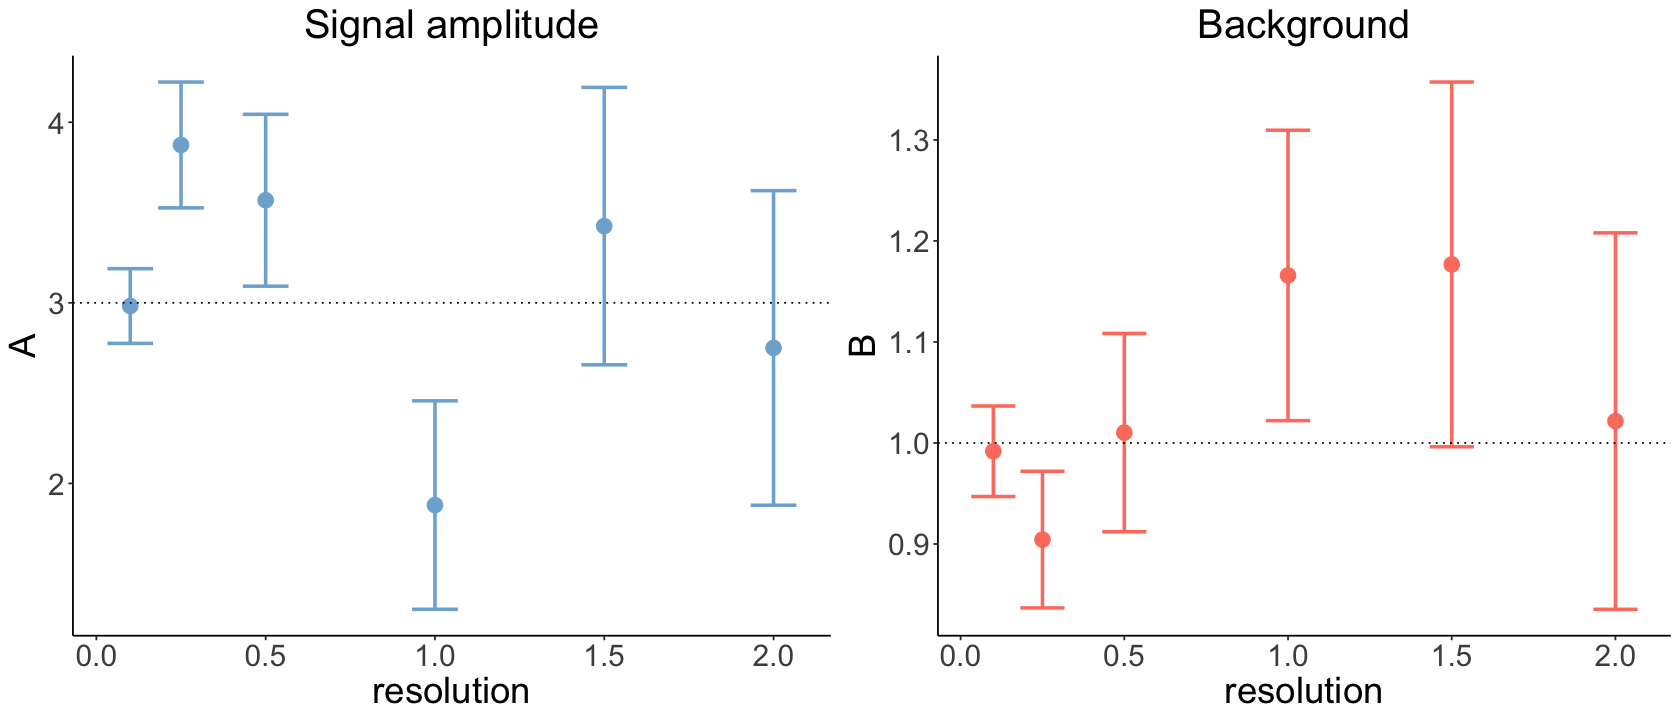

In [159]:
plt_a <- ggplot() +
geom_point(
    aes(
        x = r_list,
        y = a_means
    ),
    size = 4,
    color = colors[2]
) + 
geom_errorbar(
    aes(
        x = r_list,
        ymin = a_means - a_stds,
        ymax = a_means + a_stds
    ),
    color = colors[2],
    size = 1
) +
geom_hline(
    yintercept = a_true,
    linetype = "dotted",
    size = 0.5,
    color = "black"
) +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    legend.title = element_text(size = fontsize),
    legend.text  = element_text(size = fontsize),
    legend.position = "none"
    # panel.grid.major.y = element_line(
    #     color    = alpha("black", 0.2),
    #     size     = 0.5,
    #     linetype = 1
    # )
) +
labs(
    title = "Signal amplitude",
    x     = "resolution",
    y     = "A",
) +
# coord_cartesian(ylim = c(0, 4)) +
scale_x_continuous(breaks = pretty_breaks())

plt_b <- ggplot() +
geom_point(
    aes(
        x = r_list,
        y = b_means
    ),
    size = 4,
    color = colors[1]
) + 
geom_errorbar(
    aes(
        x = r_list,
        ymin = b_means - b_stds,
        ymax = b_means + b_stds
    ),
    color = colors[1],
    size = 1
) +
geom_hline(
    yintercept = b_true,
    linetype = "dotted",
    size = 0.5,
    color = "black"
) +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    legend.title = element_text(size = fontsize),
    legend.text  = element_text(size = fontsize),
    legend.position = "none"
    # panel.grid.major.y = element_line(
    #     color    = alpha("black", 0.2),
    #     size     = 0.5,
    #     linetype = 1
    # )
) +
labs(
    title = "Background",
    x     = "resolution",
    y     = "B",
) +
# coord_cartesian(ylim = c(0, 4)) +
scale_x_continuous(breaks = pretty_breaks())

plots <- list(plt_a, plt_b)
options(repr.plot.width = 14, repr.plot.height = 6)
print(ggarrange(plotlist = plots, ncol = 2, nrow = 1))
options(repr.plot.width = std_width, repr.plot.height = std_height)


## B)

Here we change the Signal/Background ratio used to simulate the data and check the effect on the result.

In [160]:
# parameters
x0      <- 0
w       <- 1
a_list  <- c(1, 2, 5, 10, 20, 50)
b_true  <- 2
delta_t <- 5

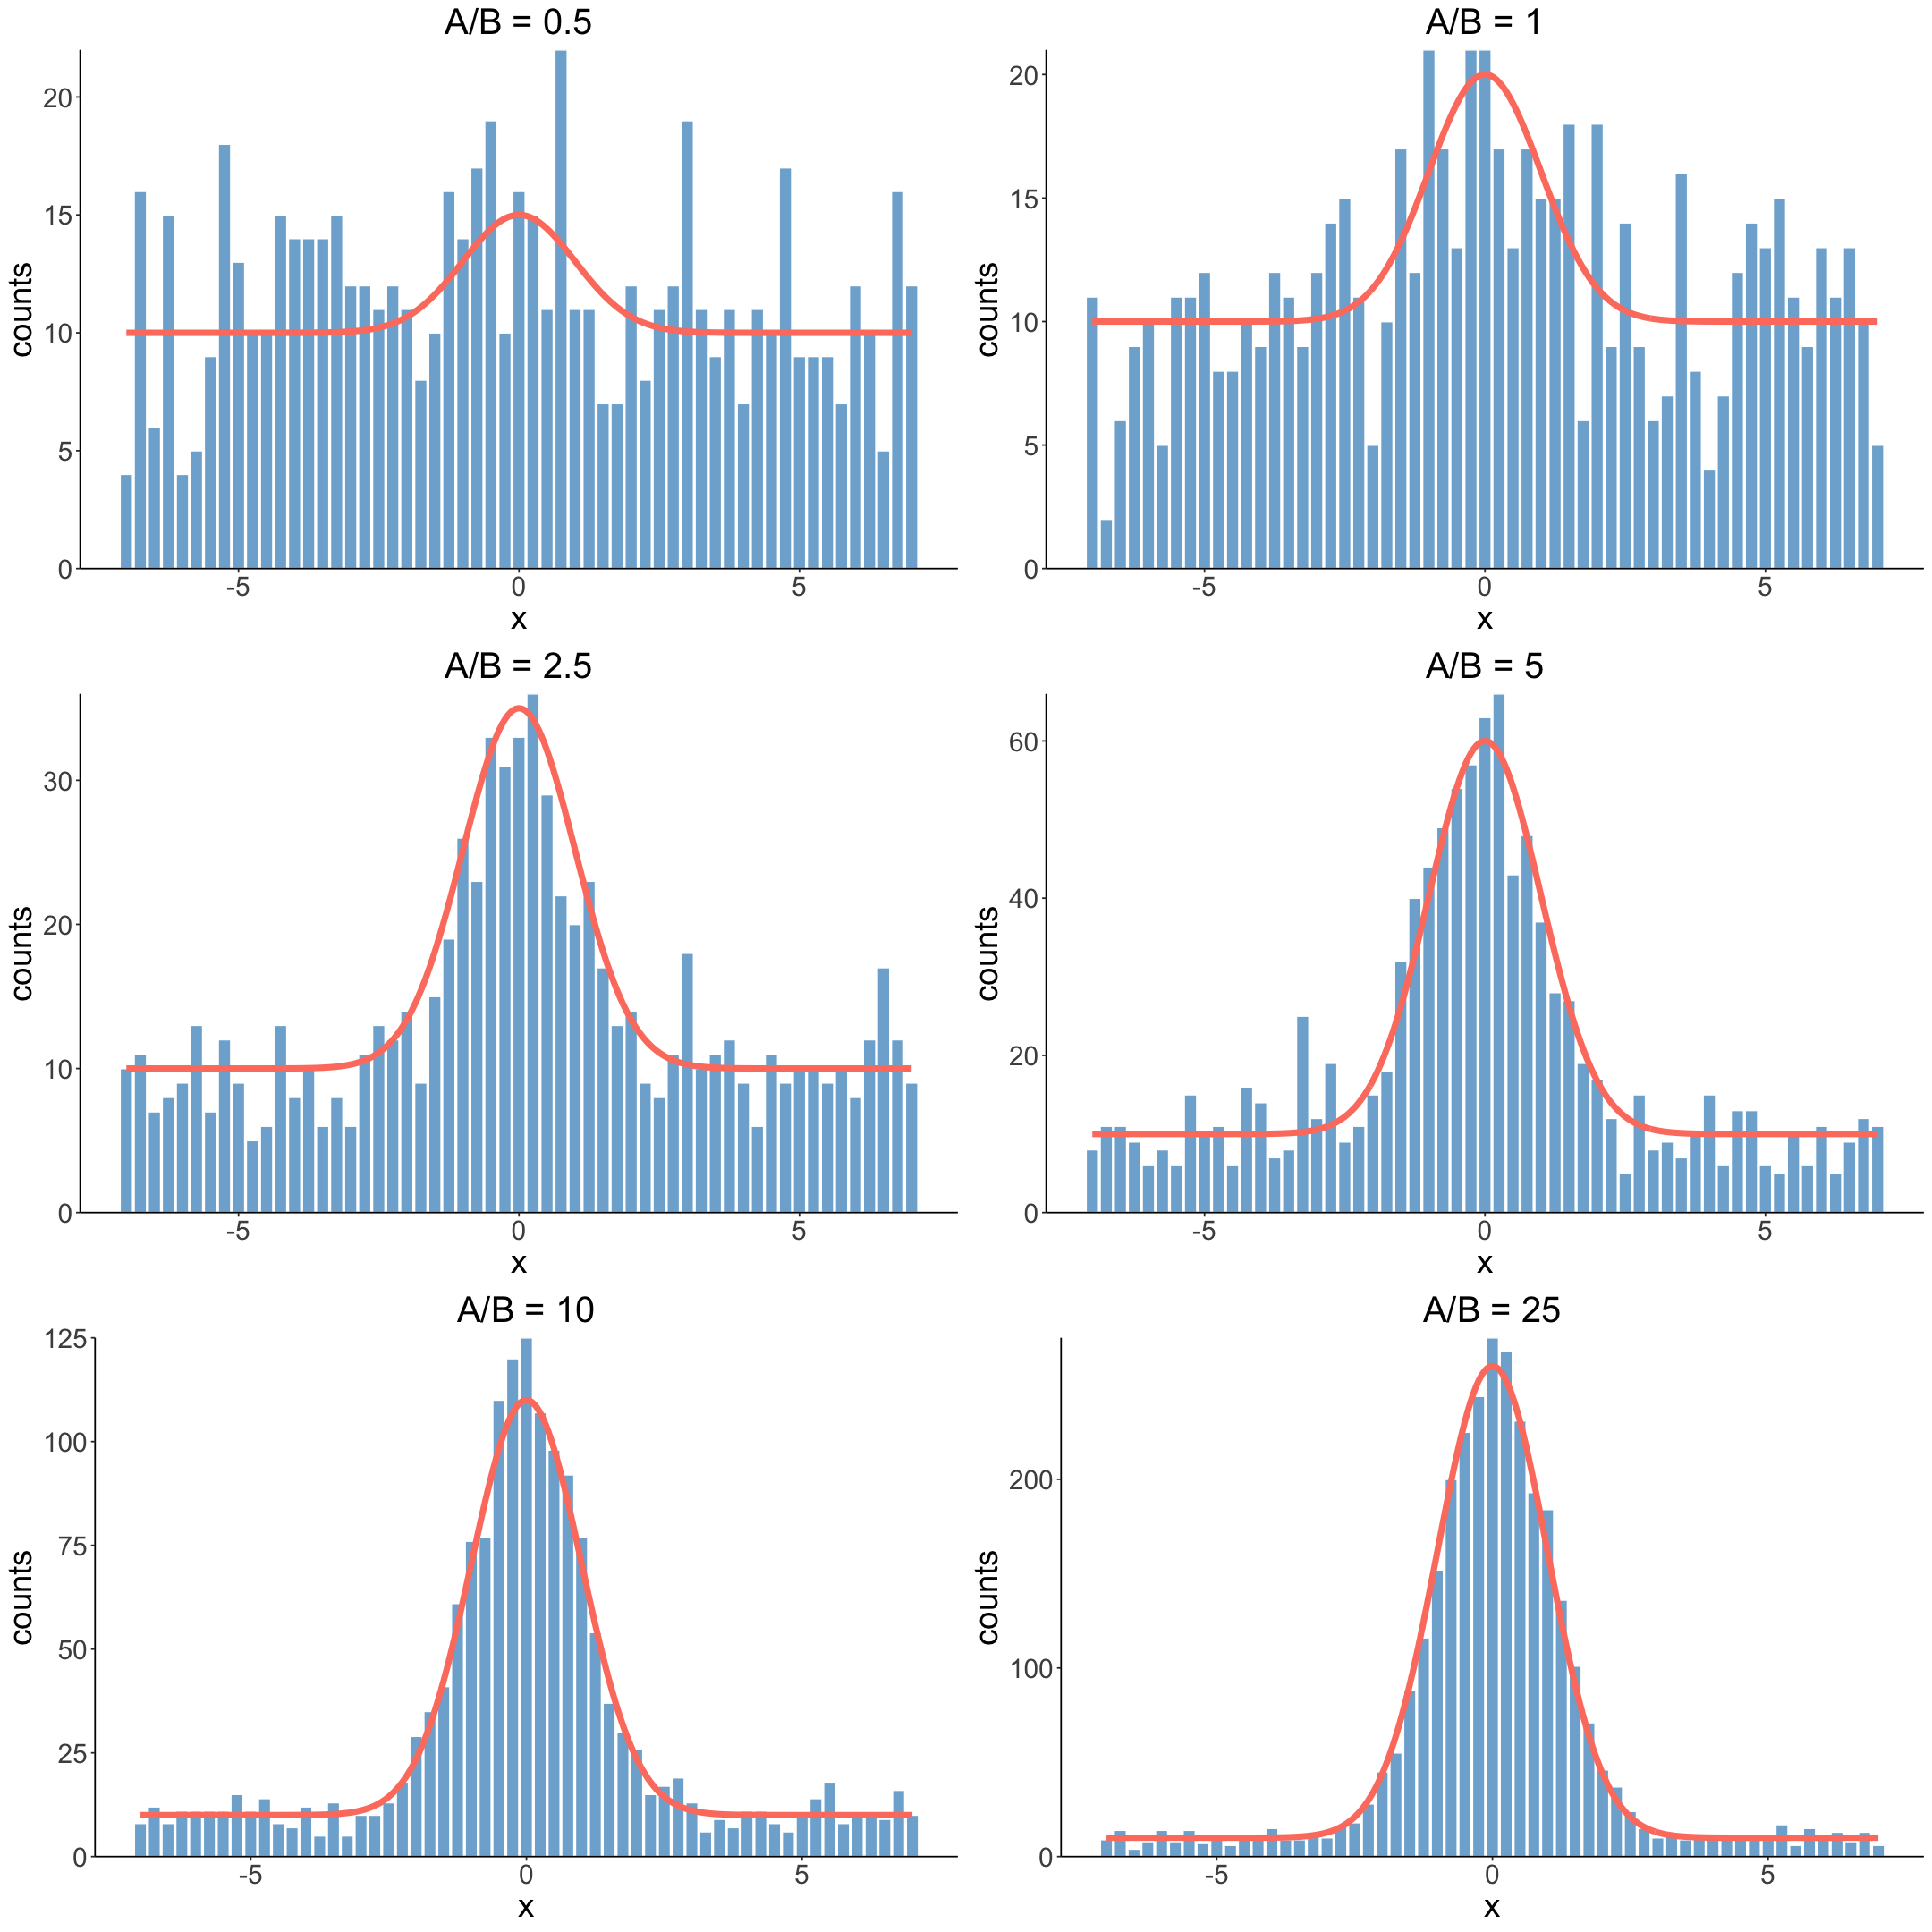

In [161]:
xdat   <- seq(
    from = -7   * w,
    to   = 7    * w,
    by   = 0.25 * w
)

plots <- list()
i <- 1
for (a in a_list) {

    ratio <- a / b_true

    s_true <- data_generator(xdat, a, b_true, x0, w, delta_t)
    ddat   <- rpois(length(s_true), s_true)

    x_grid <- seq(from = min(xdat), to = max(xdat), by = 0.05 * w)
    s_plot <- data_generator(x_grid, a, b_true, x0, w, delta_t)

    plt <- sig_bkg_plot(
        xdat,
        ddat,
        x_grid,
        s_plot,
        title = glue("A/B = {ratio}"),
        legend = FALSE
    )

    plots[[i]] <- ggplotGrob(plt)

    i <- i + 1
}

options(repr.plot.width = 18, repr.plot.height = 18)
ggarrange(plotlist = plots, ncol = 2, nrow = 3)
options(repr.plot.width = std_width, repr.plot.height = std_height)

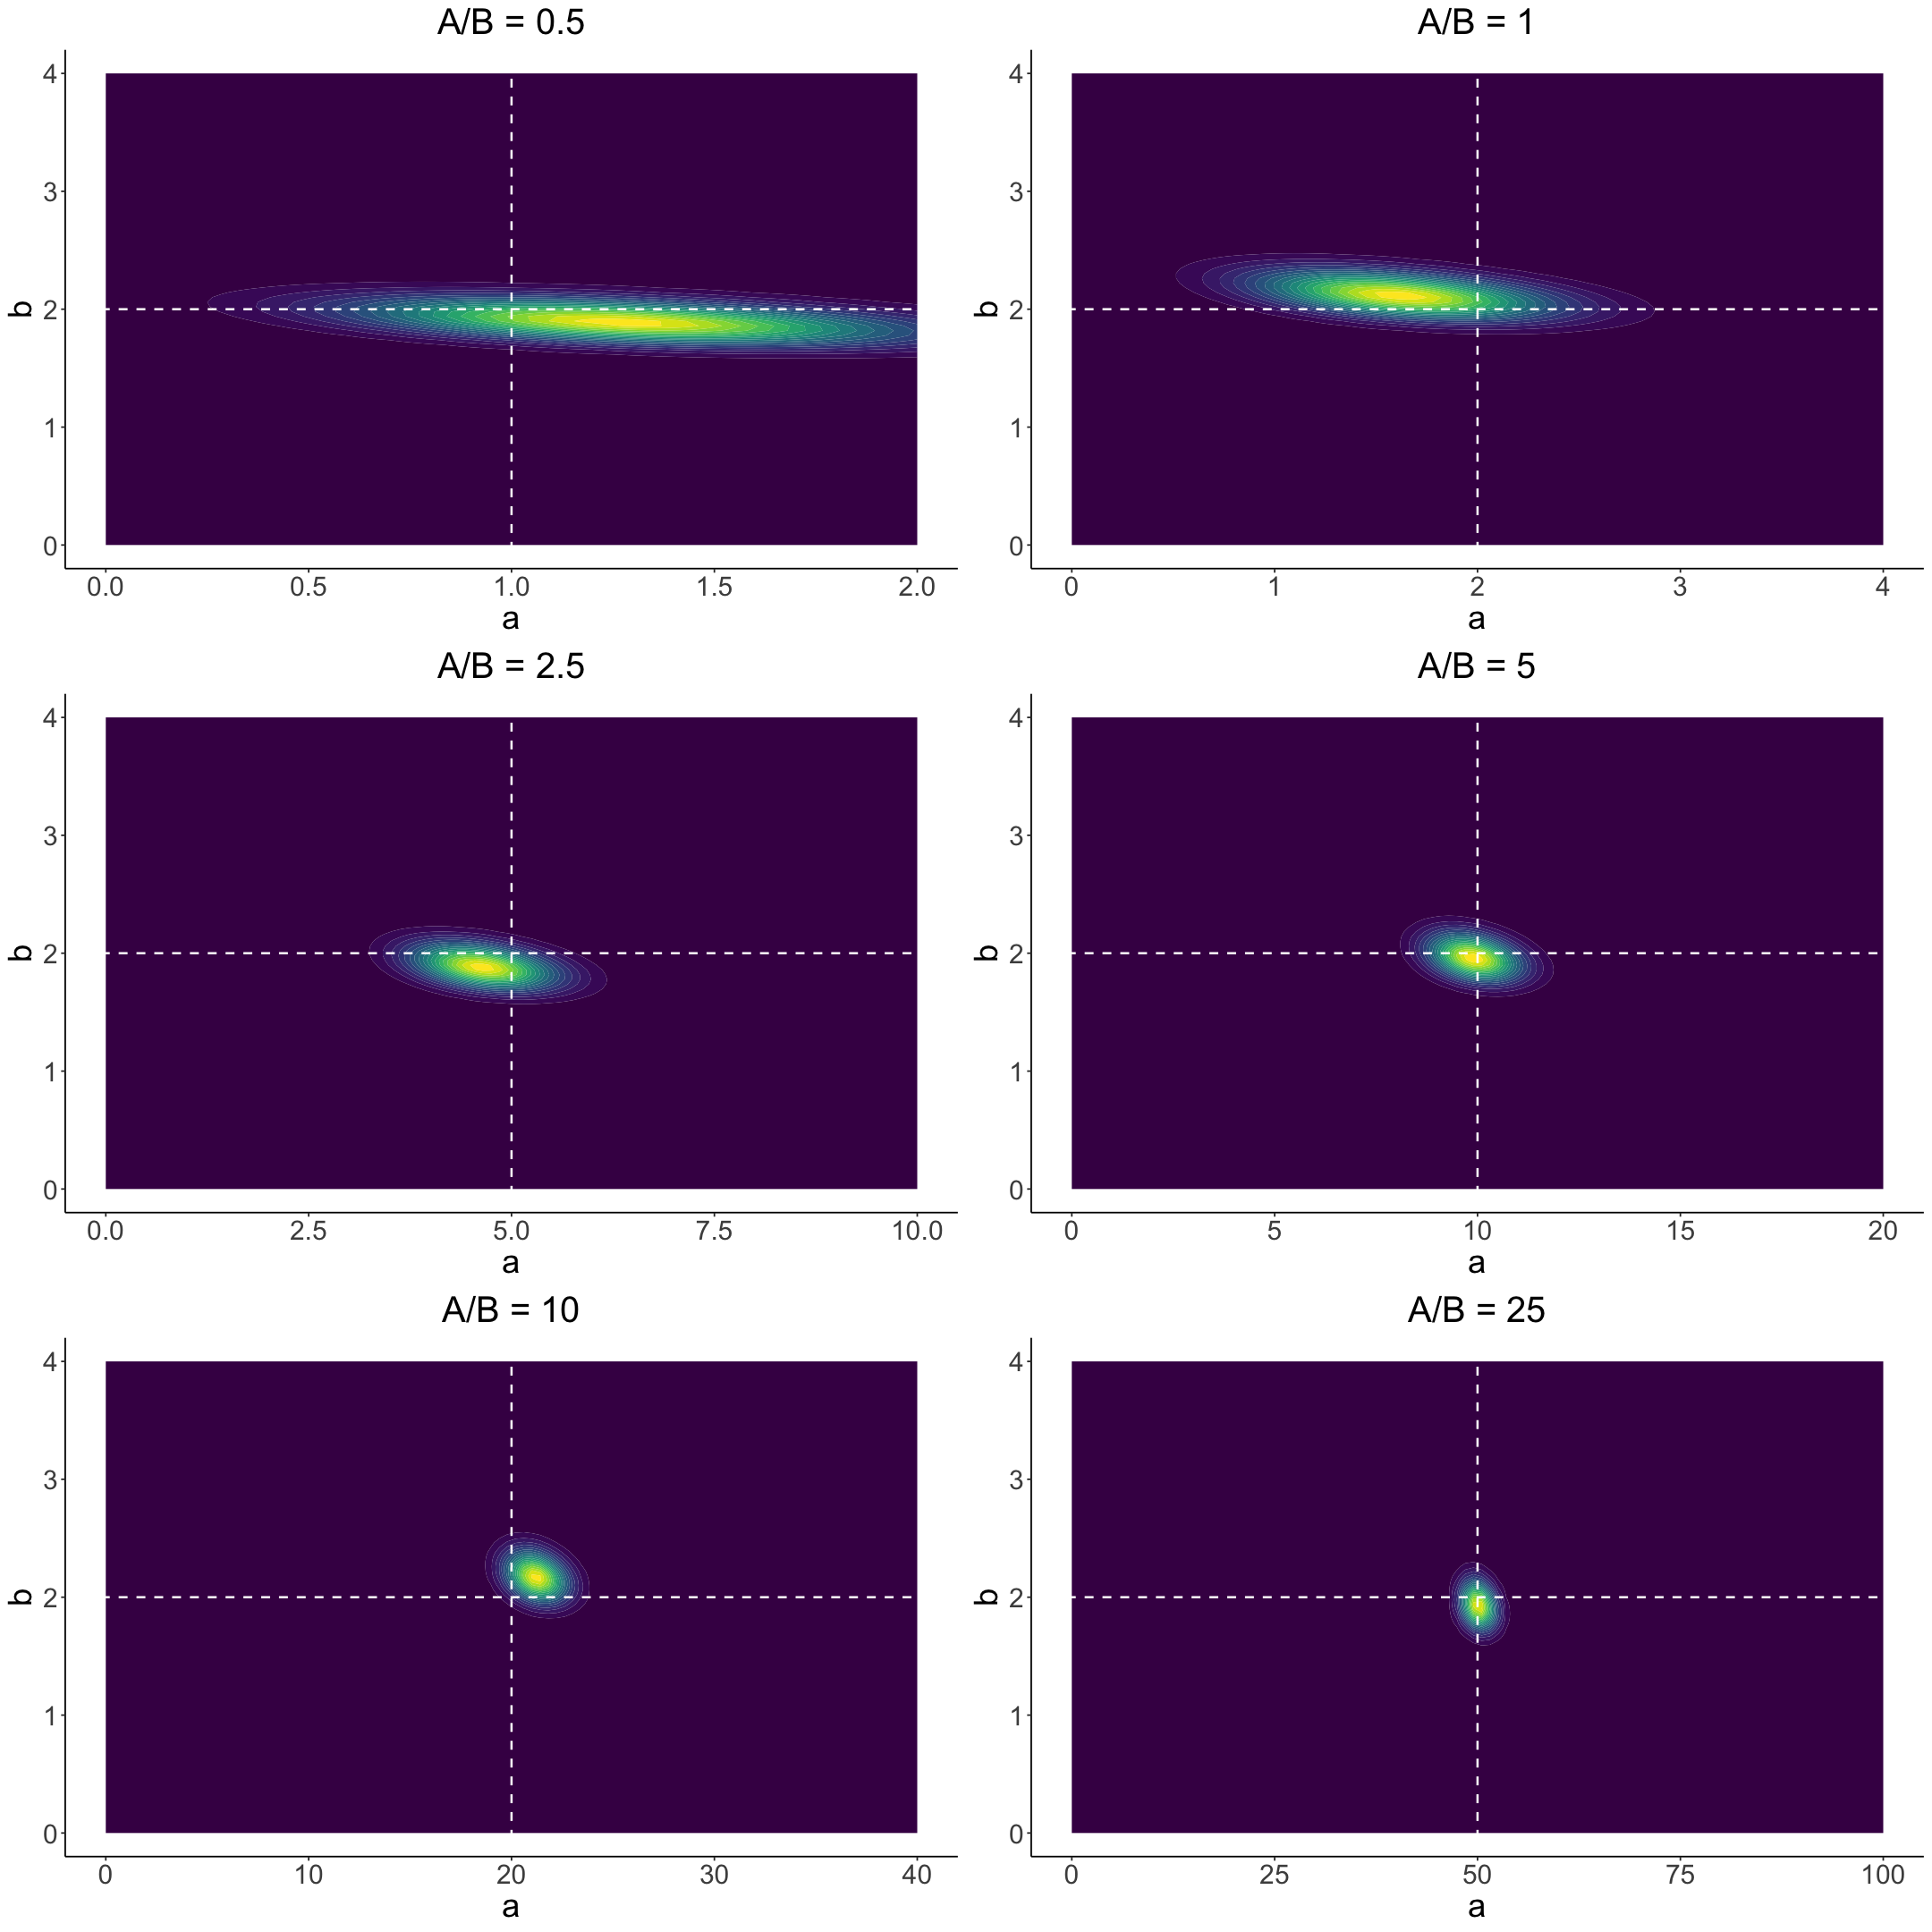

In [168]:
best_estimates <- vector()
a_history      <- vector()
b_history      <- vector()

i <- 1
for (a_true in a_list) {

    ratio  <- a_true / b_true

    a_min <- 0
    a_max <- 2 * a_true
    n_a   <- 100 
    da    <- (a_max - a_min) / n_a
    a <- seq(a_min, a_max, len = n_a)

    b_min <- 0
    b_max <- 4
    n_b   <- 100
    db    <- (b_max - b_min) / n_b
    b <- seq(b_min, b_max, len = n_b)

    xdat   <- seq(from = -7 * w, to = 7 * w, by = 0.5 * w)
    s_true <- data_generator(xdat, a_true, b_true, x0, w, delta_t)
    ddat   <- rpois(length(s_true), s_true)

    log_likelihood <- compute_log_likelihood(ddat, xdat, a, b, x0, w, delta_t)

    posterior_  <- exp(log_likelihood)
    posterior   <- posterior_ / (da * db * sum(posterior_))
    posterior   <- matrix(posterior, nrow = n_a, byrow = TRUE)

    # posterior   <- posterior - max(posterior)

    df <- tibble(expand_grid(a, b), melt(posterior)$value)
    colnames(df) <- c("a", "b", "posterior")


    best_idx <- which.max(df$posterior)

    a_post <- colSums(posterior) * db
    a_mean <- compute_mean_std(a, a_post, da)[1]
    a_std  <- compute_mean_std(a, a_post, da)[2]

    b_post <- rowSums(posterior) * da
    b_mean <- compute_mean_std(b, b_post, db)[1]
    b_std  <- compute_mean_std(b, b_post, db)[2]

    best_estimates <- cbind(best_estimates, c(a_mean, a_std, b_mean, b_std))

    a_history      <- cbind(a_history, a_post)
    b_history      <- cbind(b_history, b_post)
    r_history      <- cbind(r_history, compute_cov(a, a_mean, a_std, da, b, b_mean, b_std, db, posterior))


    plt <- plot_posterior_2d(
        data = df,
        col1 = "a",
        col2 = "b",
        col3 = "posterior",
        xlab = "a",
        ylab = "b",
        zlab = "density",
        title = glue("A/B = {ratio}")
    )

    plt <- plt + 
    geom_vline(
        xintercept = a_true,
        color = "white",
        size = 0.7,
        linetype = "dashed"
    ) +
    geom_hline(
        yintercept = b_true,
        color = "white",
        size = 0.7,
        linetype = "dashed"
    )
    plots[[i]] <- ggplotGrob(plt)
    i <- i + 1

}

options(repr.plot.width = 18, repr.plot.height = 18)
ggarrange(plotlist = plots, ncol = 2, nrow = 3)
options(repr.plot.width = std_width, repr.plot.height = std_height)

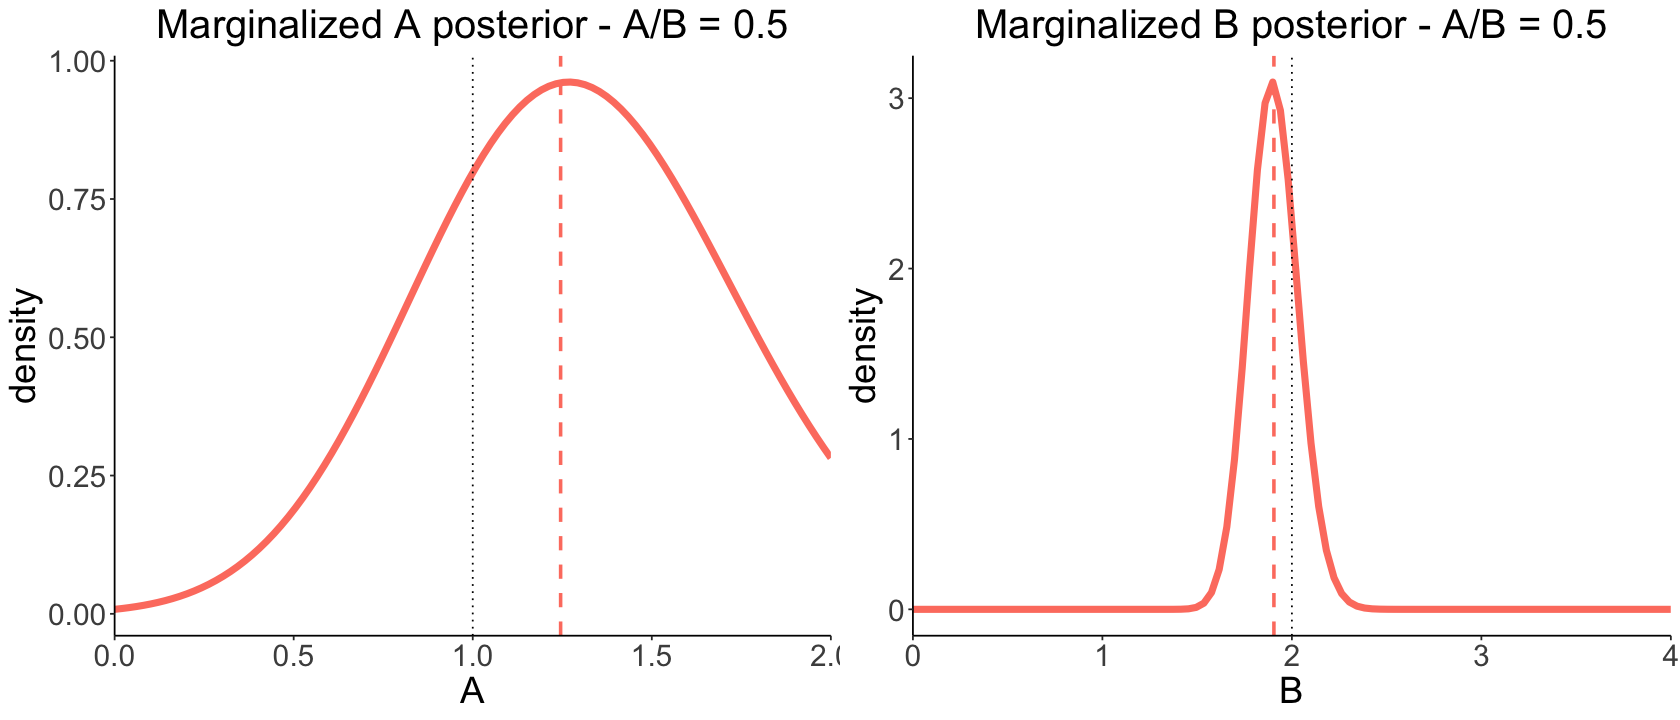

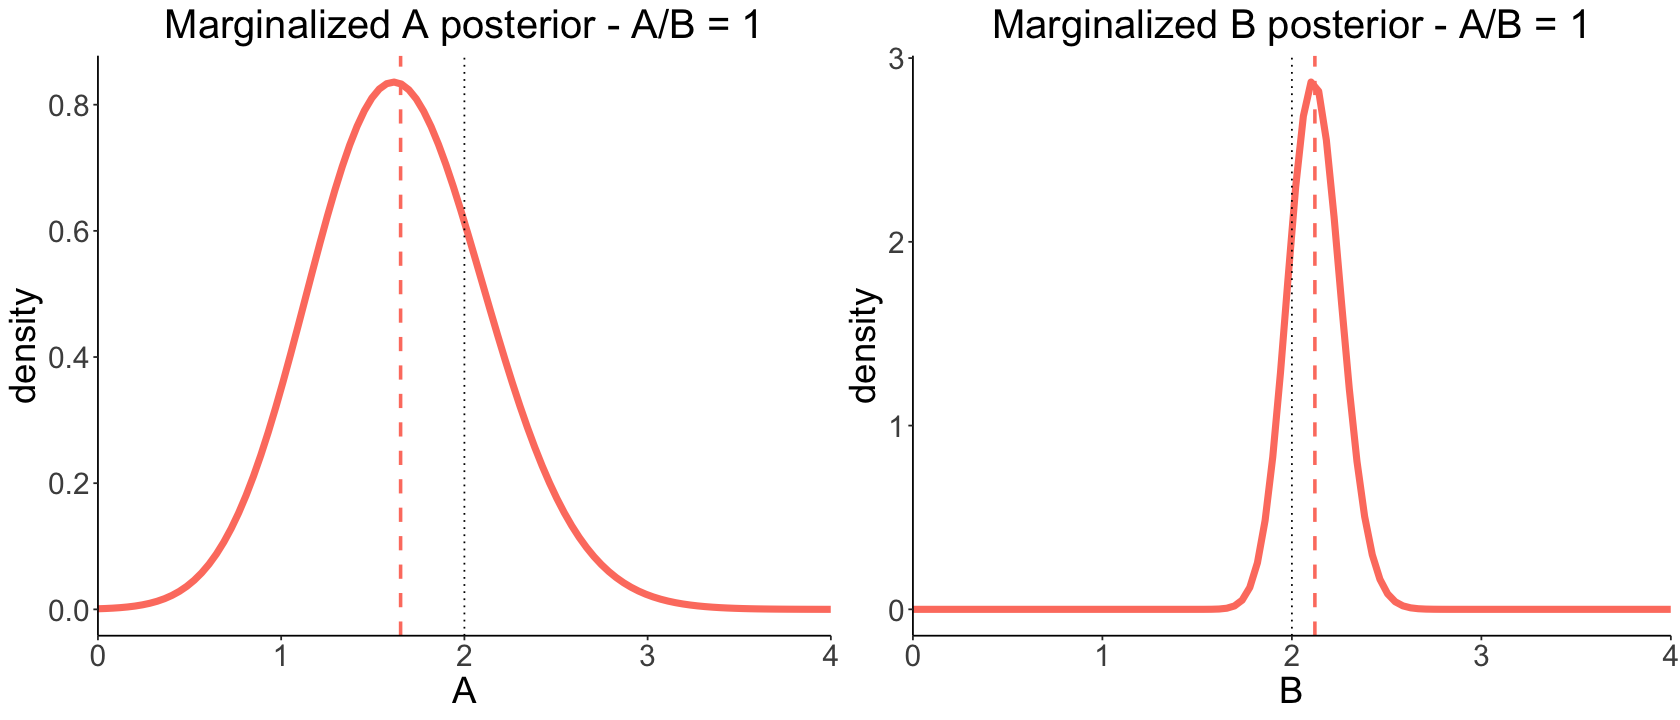

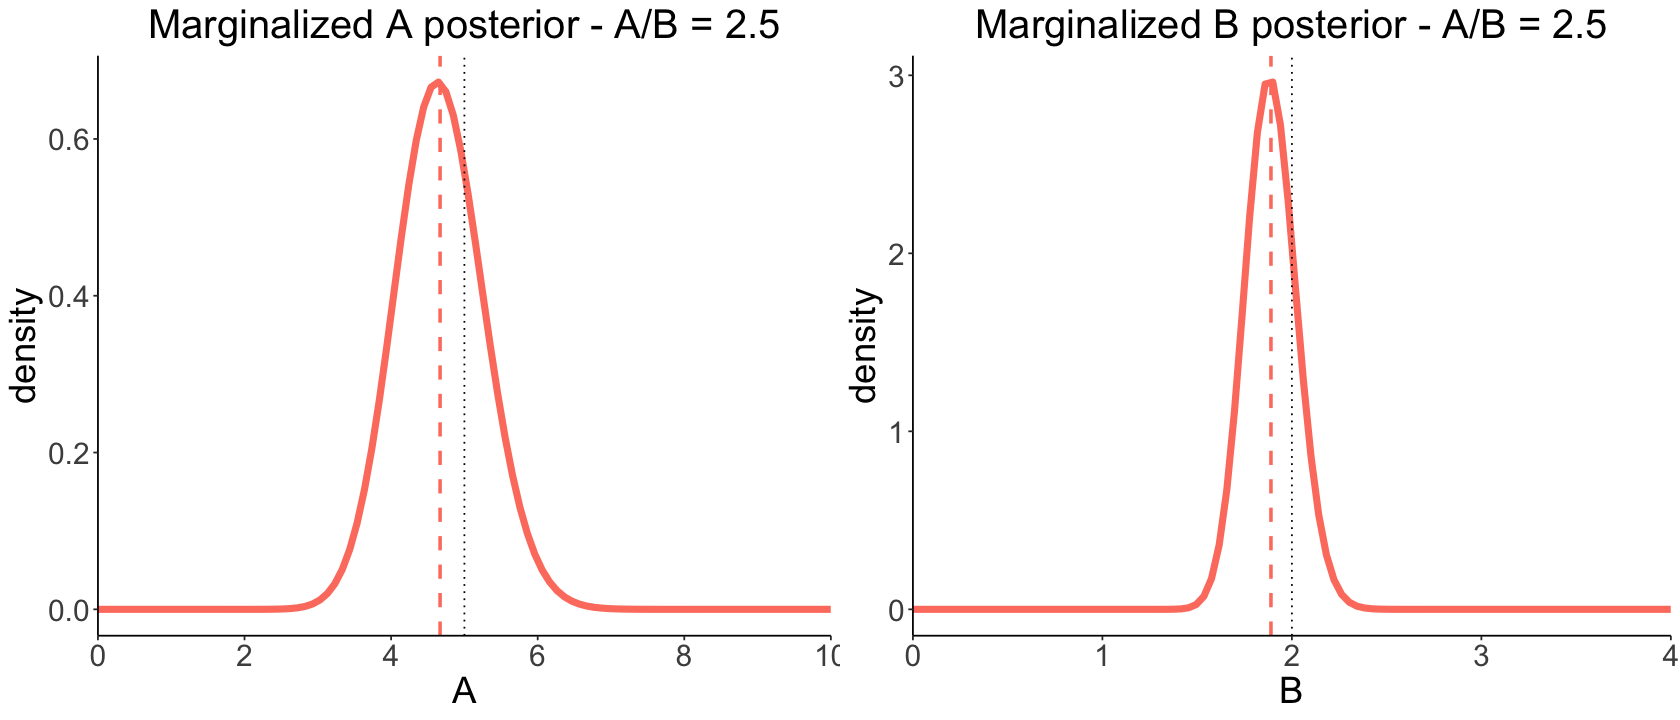

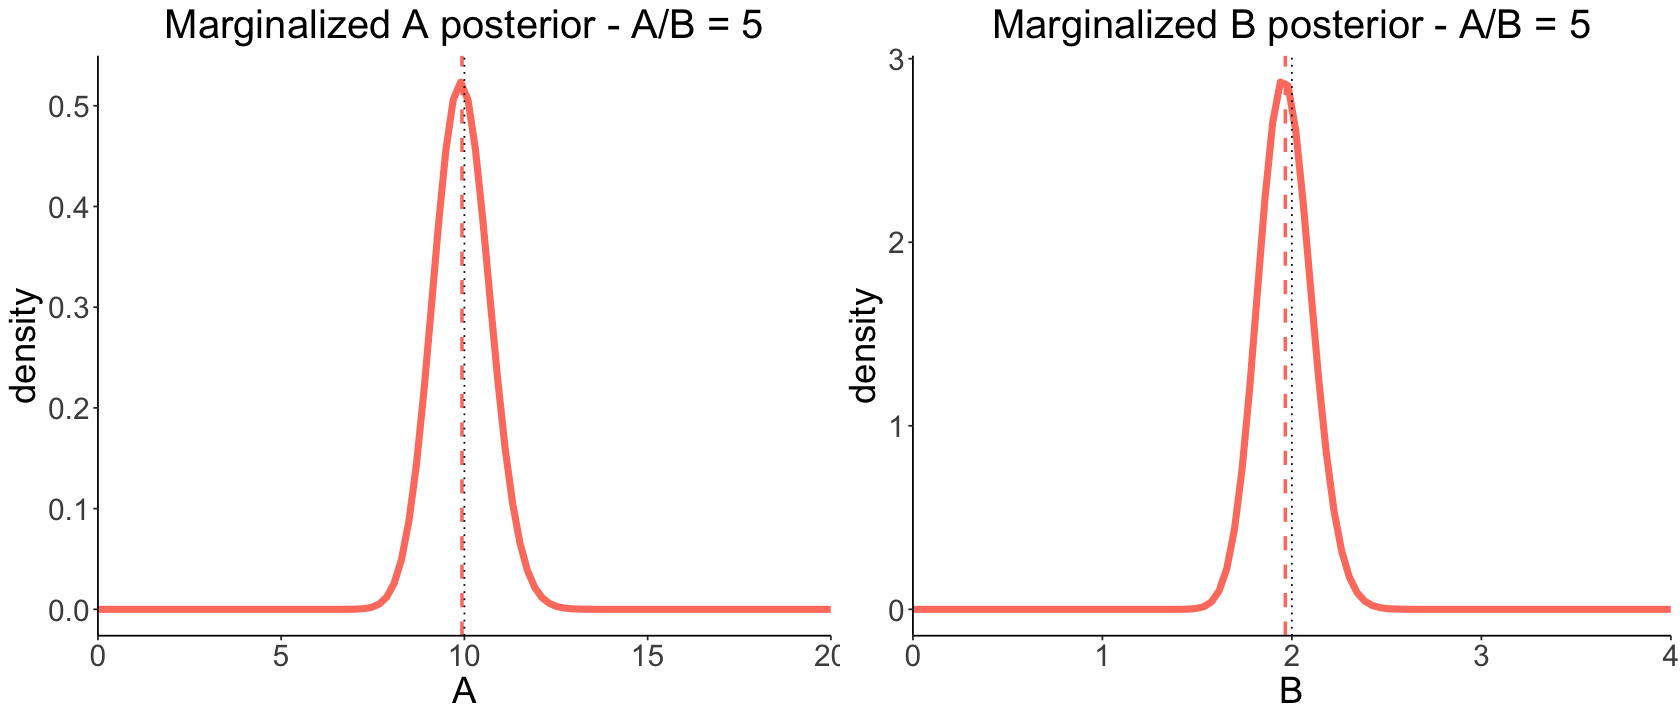

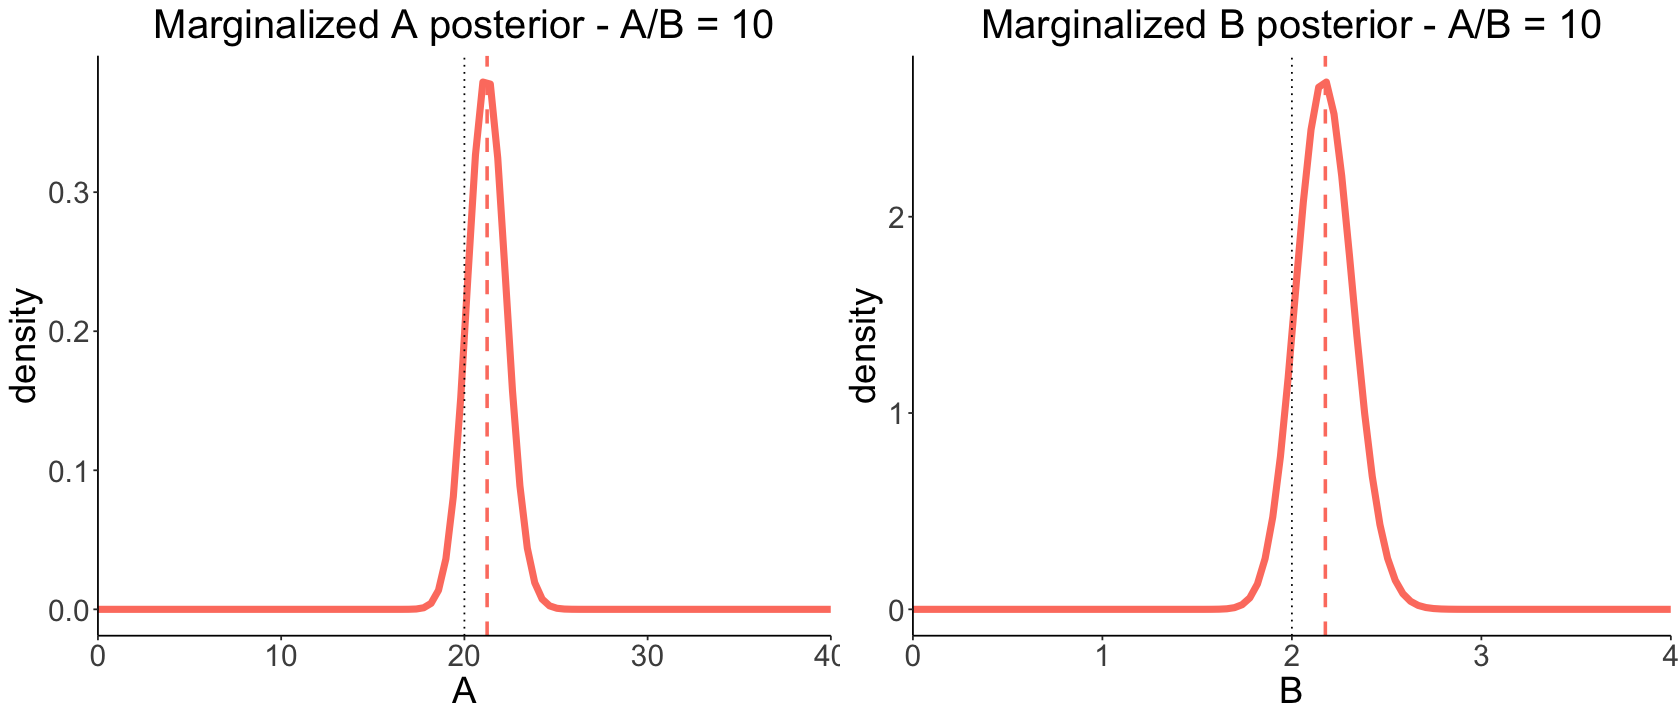

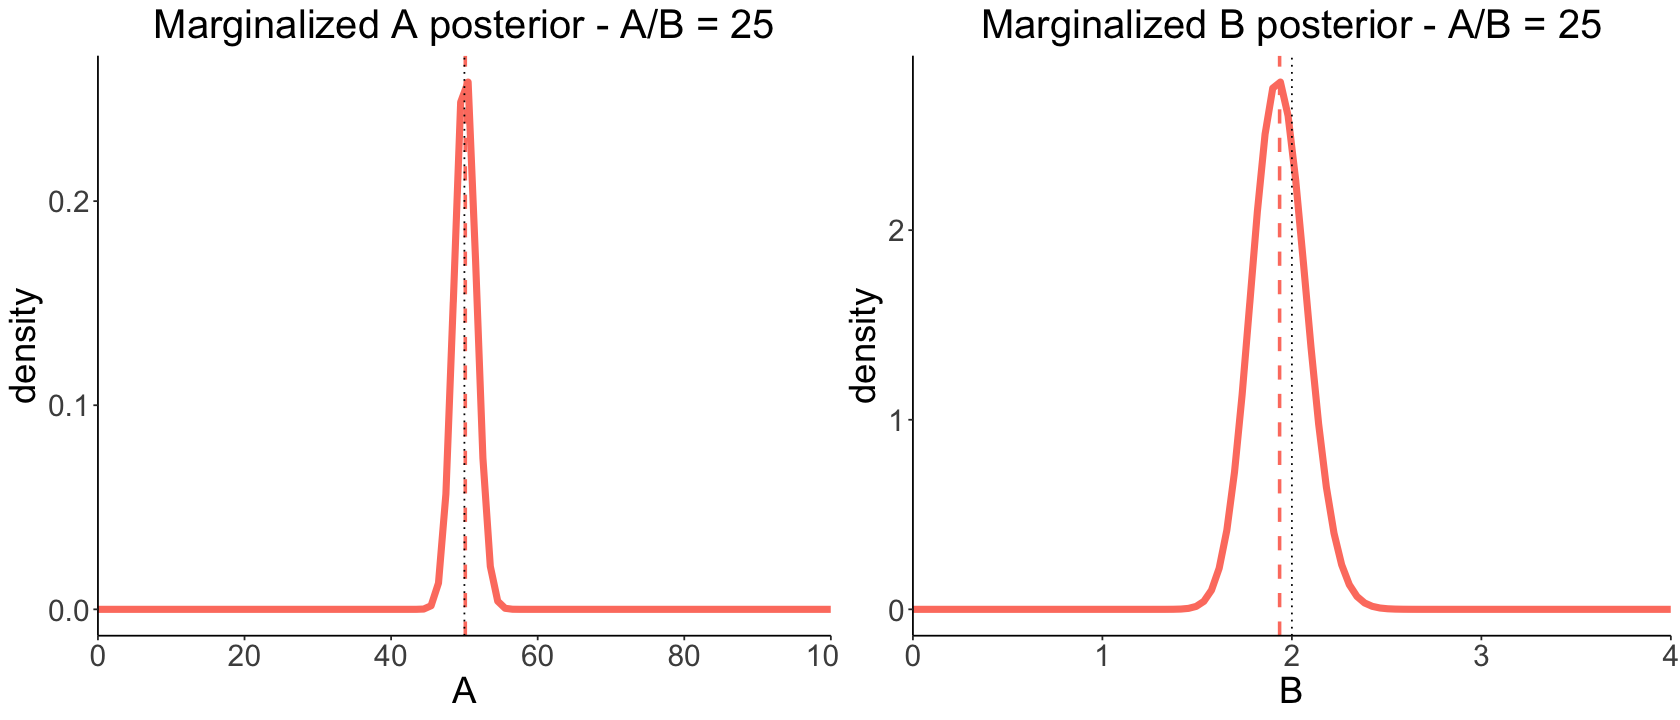

In [183]:
a_means <- best_estimates[1, ]
a_stds  <- best_estimates[2, ]
b_means <- best_estimates[3, ]
b_stds  <- best_estimates[4, ]

i <- 0
for (a_true in a_list) {

    ratio  <- a_true / b_true

    a_min <- 0
    a_max <- 2 * a_true
    n_a   <- 100 
    da    <- (a_max - a_min) / n_a
    a <- seq(a_min, a_max, len = n_a)

    b_min <- 0
    b_max <- 4
    n_b   <- 100
    db    <- (b_max - b_min) / n_b
    b <- seq(b_min, b_max, len = n_b)

    plt_a <- plot_posterior(
        parameter = a,
        posterior = a_history[, i],
        xmin = a_min,
        xmax = a_max,
        xlab = "A"
    )

    plt_a <- plt_a + geom_vline(
        xintercept = a_means[i+1],
        linetype = "dashed",
        size = 1,
        color = colors[1]
    ) + 
    geom_vline(
        xintercept =  a_true,
        linetype = "dotted",
        size = 0.5,
        color = "black"
    ) + 
    labs(title = glue("Marginalized A posterior - A/B = {ratio}")) 



    plt_b <- plot_posterior(
        parameter = b,
        posterior = b_history[, i],
        xmin = b_min,
        xmax = b_max,
        xlab = "B"
    )

    plt_b <- plt_b + geom_vline(
        xintercept = b_means[i+1],
        linetype = "dashed",
        size = 1,
        color = colors[1]
    ) + 
    geom_vline(
        xintercept = b_true,
        linetype = "dotted",
        size = 0.5,
        color = "black"
    ) + 
    labs(title = glue("Marginalized B posterior - A/B = {ratio}")) 

    plots <- list(plt_a, plt_b)

    i <- i + 1

    options(repr.plot.width = 14, repr.plot.height = 6)
    print(ggarrange(plotlist = plots, ncol = 2, nrow = 1))
}
options(repr.plot.width = std_width, repr.plot.height = std_height)


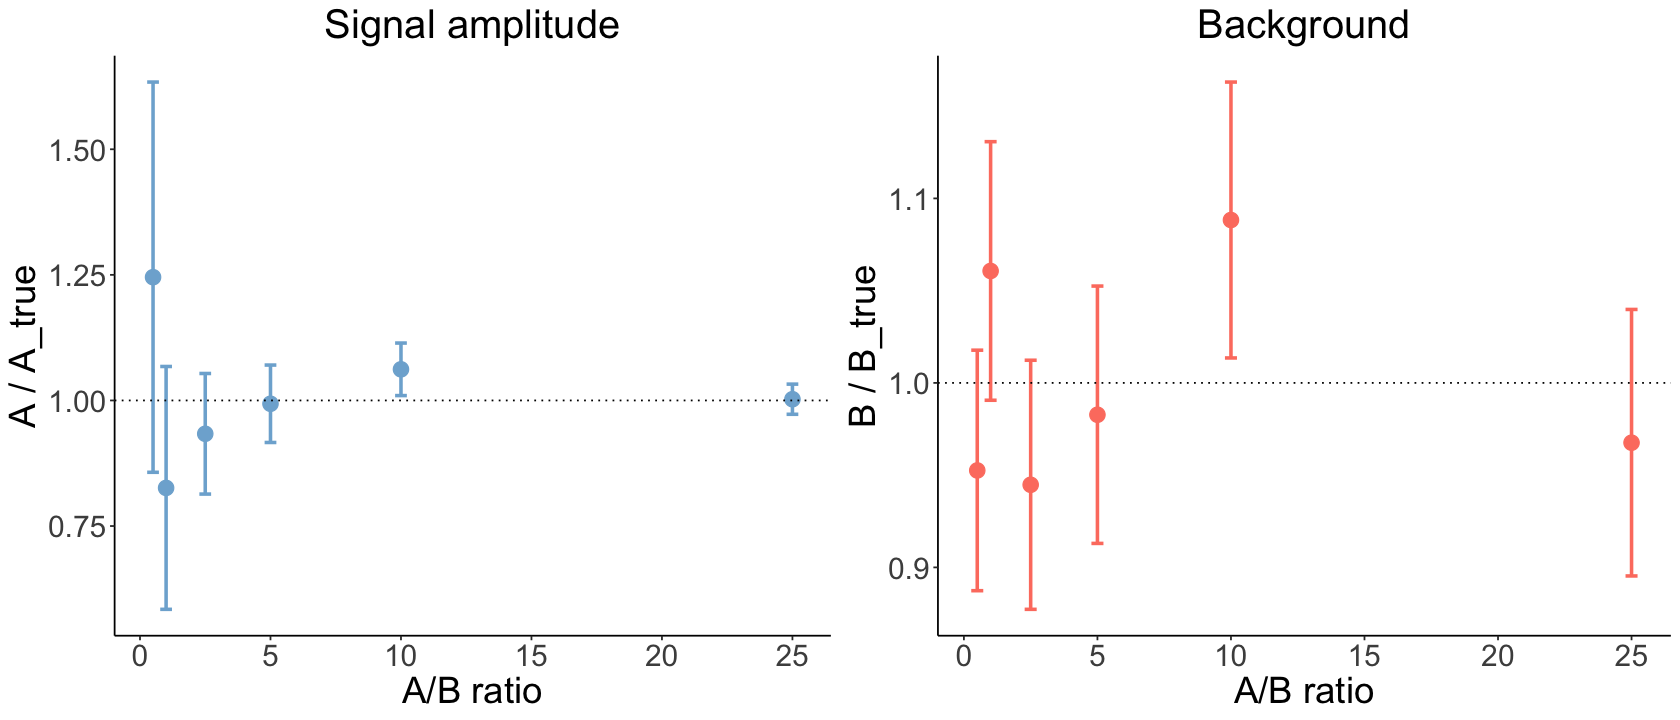

In [194]:
plt_a <- ggplot() +
geom_point(
    aes(
        x = a_list / b_true,
        y = a_means / a_list
    ),
    size = 4,
    color = colors[2]
) + 
geom_errorbar(
    aes(
        x = a_list / b_true,
        ymin = a_means / a_list - a_stds / a_list,
        ymax = a_means / a_list + a_stds / a_list
    ),
    color = colors[2],
    size = 1
) +
geom_hline(
    yintercept = 1,
    linetype = "dotted",
    size = 0.5,
    color = "black"
) +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    legend.title = element_text(size = fontsize),
    legend.text  = element_text(size = fontsize),
    legend.position = "none"
    # panel.grid.major.y = element_line(
    #     color    = alpha("black", 0.2),
    #     size     = 0.5,
    #     linetype = 1
    # )
) +
labs(
    title = "Signal amplitude",
    x     = "A/B ratio",
    y     = "A / A_true",
) +
# coord_cartesian(ylim = c(0, 4)) +
scale_x_continuous(breaks = pretty_breaks())

plt_b <- ggplot() +
geom_point(
    aes(
        x = a_list / b_true,
        y = b_means / b_true
    ),
    size = 4,
    color = colors[1]
) + 
geom_errorbar(
    aes(
        x = a_list / b_true,
        ymin = b_means / b_true - b_stds / b_true,
        ymax = b_means / b_true + b_stds / b_true
    ),
    color = colors[1],
    size = 1
) +
geom_hline(
    yintercept = 1,
    linetype = "dotted",
    size = 0.5,
    color = "black"
) +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    legend.title = element_text(size = fontsize),
    legend.text  = element_text(size = fontsize),
    legend.position = "none"
    # panel.grid.major.y = element_line(
    #     color    = alpha("black", 0.2),
    #     size     = 0.5,
    #     linetype = 1
    # )
) +
labs(
    title = "Background",
    x     = "A/B ratio",
    y     = "B / B_true",
) +
# coord_cartesian(ylim = c(0, 4)) +
scale_x_continuous(breaks = pretty_breaks())

plots <- list(plt_a, plt_b)
options(repr.plot.width = 14, repr.plot.height = 6)
print(ggarrange(plotlist = plots, ncol = 2, nrow = 1))
options(repr.plot.width = std_width, repr.plot.height = std_height)


It is clear that a greater A/B ratio gives better estimates on A, the signal amplitude parameter. Enlarging the A/B ratio, however, does not increase the estimation accuracy of B, the background amplitude parameter. 